<a href="https://colab.research.google.com/github/Rukayat-spec/Algorithmic-Trading-in-Forex-Machine-Learning-Approaches-for-GBP-EUR-Profitability/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Trading in Forex: Machine Learning Approaches for GBP/EUR Profitability**

 **Setting Up Environment**

In [1]:
!pip install scikeras
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


**Import Necessary Libraries**

In [2]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random
import tensorflow as tf
import keras_tuner as kt
import joblib
from joblib import dump, load


**Mounting Google Drive and Changing Directory**

In [3]:
#Mount google drive
drive.mount('/content/drive',force_remount=True)

#Changing directory to my project folder
os.chdir('/content/drive/MyDrive/Msc Project')

Mounted at /content/drive


In [4]:
#load the forex data into a dataframe
forex_data_f = pd.read_csv("GBP_EUR_Pair_Historical_Data.csv")

#checking the first 5 rows
forex_data_f.head()

Date    Open    High     Low   Close  Adj Close  Volume
0  2003-09-17  1.4271  1.4286  1.4237  1.4261     1.4261     0.0
1  2003-09-18  1.4261  1.4382  1.4239  1.4370     1.4370     0.0
2  2003-09-19  1.4368  1.4411  1.4333  1.4372     1.4372     0.0
3  2003-09-22  1.4354  1.4408  1.4331  1.4360     1.4360     0.0
4  2003-09-23  1.4360  1.4436  1.4341  1.4426     1.4426     0.0

In [5]:
# Check the dataset shape
print(f'The forex data contains {forex_data_f.shape[0]} number of rows and {forex_data_f.shape[1]} number of columns.')

The forex data contains 5402 number of rows and 7 number of columns.


In [6]:
#display dataframe information
forex_data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5402 non-null   object 
 1   Open       5373 non-null   float64
 2   High       5373 non-null   float64
 3   Low        5373 non-null   float64
 4   Close      5373 non-null   float64
 5   Adj Close  5373 non-null   float64
 6   Volume     5373 non-null   float64
dtypes: float64(6), object(1)
memory usage: 295.5+ KB


In [7]:
# Display summary statistics of dataframe
forex_data_f.describe()

Open         High          Low        Close    Adj Close  Volume
count  5373.000000  5373.000000  5373.000000  5373.000000  5373.000000  5373.0
mean      1.242865     1.246882     1.238706     1.242842     1.242842     0.0
std       0.130321     0.130407     0.130163     0.130289     0.130289     0.0
min       1.015700     1.032400     1.015700     1.015700     1.015700     0.0
25%       1.145800     1.149510     1.141360     1.145690     1.145690     0.0
50%       1.181800     1.185800     1.177800     1.181700     1.181700     0.0
75%       1.350400     1.355800     1.344600     1.349400     1.349400     0.0
max       1.526200     1.529500     1.521400     1.526200     1.526200     0.0

# **Pre-processing data steps, and Exploratory Data Analysis(EDA)**

In [8]:
# Display the sum of null values for each of the dataset columns
forex_data_f.isnull().sum()

Date          0
Open         29
High         29
Low          29
Close        29
Adj Close    29
Volume       29
dtype: int64

In [9]:
# Remove rows with null values in all columns
cleaned_forex_data_f = forex_data_f.dropna()

In [10]:
# Check cleaned_forex_data_f shape
print(f'cleaned_forex_data_f contains {cleaned_forex_data_f.shape[0]} number of rows and {cleaned_forex_data_f.shape[1]} number of columns.')

cleaned_forex_data_f contains 5373 number of rows and 7 number of columns.


In [11]:
#check cleaned_forex_data_f columns with null value
cleaned_forex_data_f.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# Drop columns Adj close and Volume. Adj Close Prices has the same values as the Close Prices and Volume Column has values O in all its records.
cleaned_forex_data_f = cleaned_forex_data_f.drop(columns=['Adj Close','Volume'])
cleaned_forex_data_f.head()

Date    Open    High     Low   Close
0  2003-09-17  1.4271  1.4286  1.4237  1.4261
1  2003-09-18  1.4261  1.4382  1.4239  1.4370
2  2003-09-19  1.4368  1.4411  1.4333  1.4372
3  2003-09-22  1.4354  1.4408  1.4331  1.4360
4  2003-09-23  1.4360  1.4436  1.4341  1.4426

In [13]:
# showing statistics of cleaned_forex_data_f
cleaned_forex_data_f.describe()

Open         High          Low        Close
count  5373.000000  5373.000000  5373.000000  5373.000000
mean      1.242865     1.246882     1.238706     1.242842
std       0.130321     0.130407     0.130163     0.130289
min       1.015700     1.032400     1.015700     1.015700
25%       1.145800     1.149510     1.141360     1.145690
50%       1.181800     1.185800     1.177800     1.181700
75%       1.350400     1.355800     1.344600     1.349400
max       1.526200     1.529500     1.521400     1.526200

In [14]:
# Show the data types of cleaned_forex_data_f
cleaned_forex_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5373 entries, 0 to 5401
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5373 non-null   object 
 1   Open    5373 non-null   float64
 2   High    5373 non-null   float64
 3   Low     5373 non-null   float64
 4   Close   5373 non-null   float64
dtypes: float64(4), object(1)
memory usage: 380.9+ KB


In [15]:
# Change column Date to datetime format
cleaned_forex_data_f['Date'] = pd.to_datetime(cleaned_forex_data_f['Date'])

# Confirm date colum is now in datetime format
cleaned_forex_data_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5373 entries, 0 to 5401
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5373 non-null   datetime64[ns]
 1   Open    5373 non-null   float64       
 2   High    5373 non-null   float64       
 3   Low     5373 non-null   float64       
 4   Close   5373 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 380.9 KB


**Using the box plot method to check for outliers in the dataset**

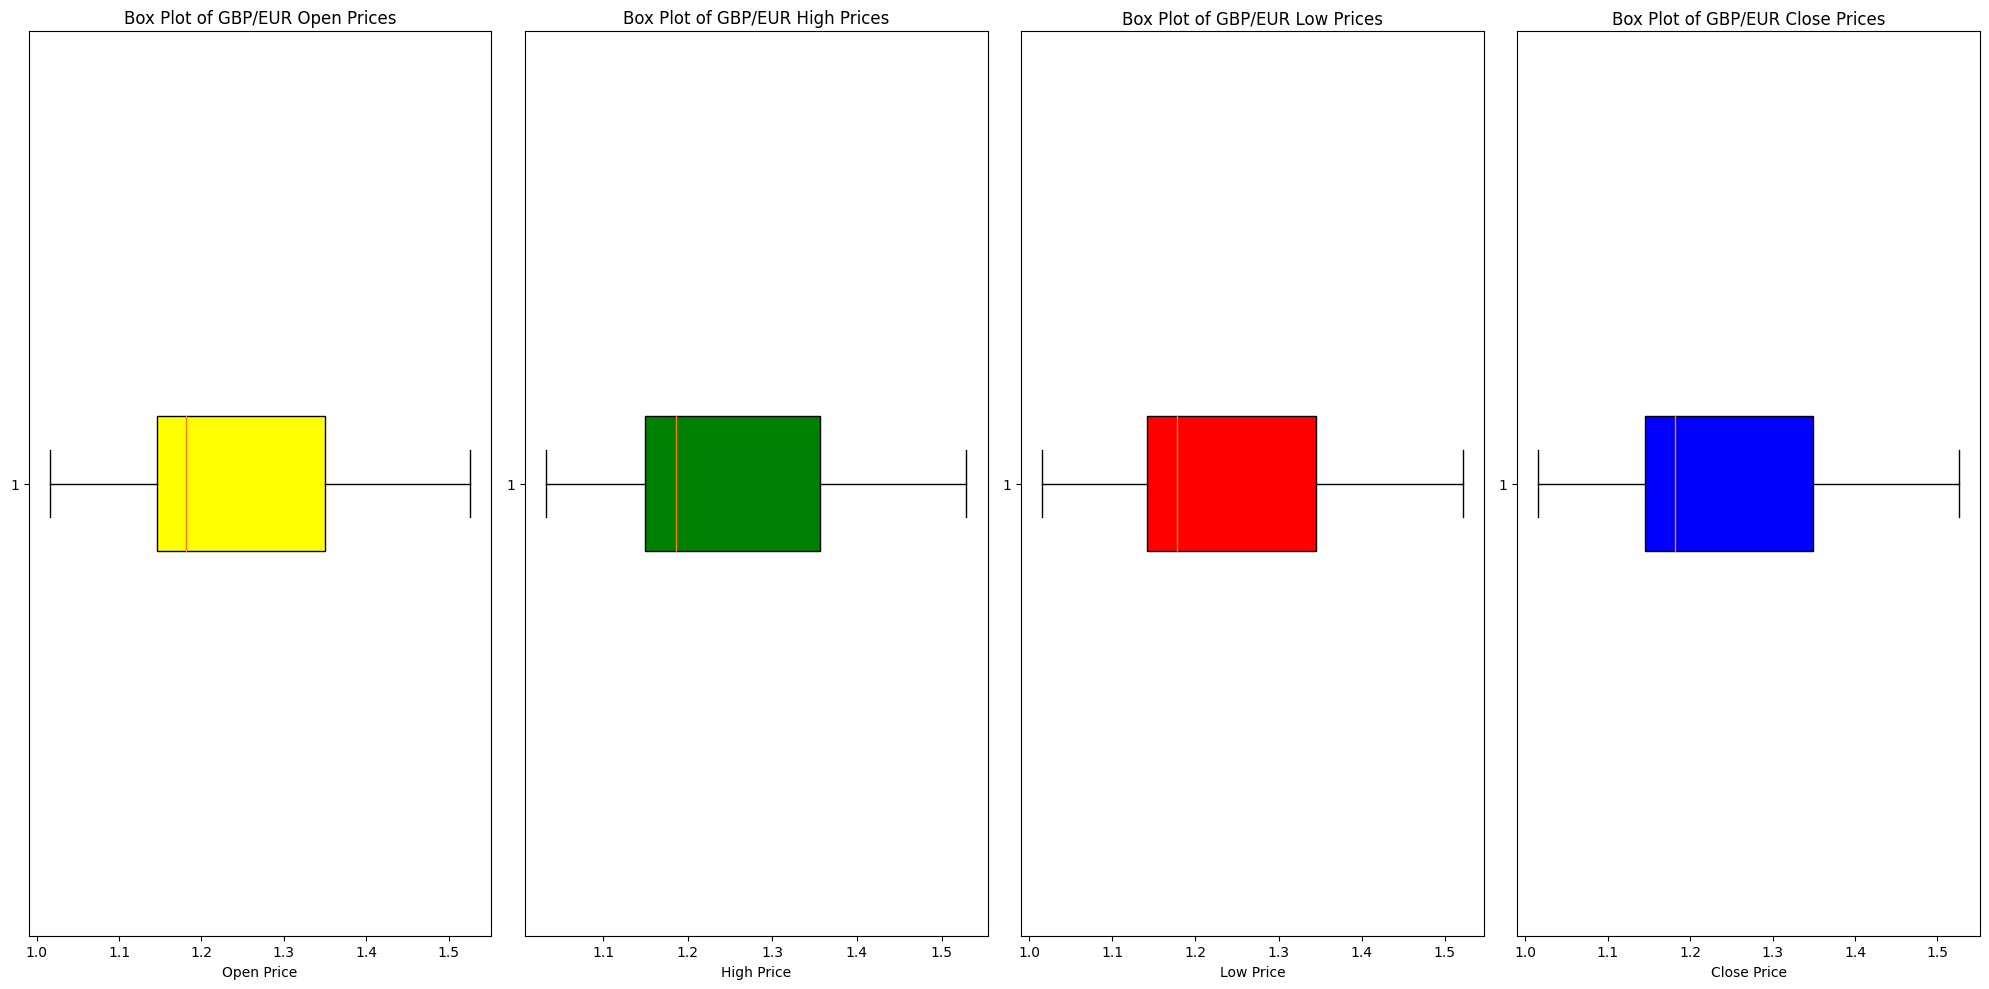

In [16]:
# Create a Sub DataFrame for the box plots
data_to_plot = cleaned_forex_data_f[['Open', 'High', 'Low', 'Close']]

# Create a figure for the plots
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

# box plot for 'Open' prices
axs[0].boxplot(data_to_plot['Open'], vert=False, patch_artist=True,
               boxprops=dict(facecolor='yellow'))
axs[0].set_title('Box Plot of GBP/EUR Open Prices')
axs[0].set_xlabel('Open Price')

# box plot for 'High' prices
axs[1].boxplot(data_to_plot['High'], vert=False, patch_artist=True,
               boxprops=dict(facecolor='green'))
axs[1].set_title('Box Plot of GBP/EUR High Prices')
axs[1].set_xlabel('High Price')

# box plot for 'Low' prices
axs[2].boxplot(data_to_plot['Low'], vert=False, patch_artist=True,
               boxprops=dict(facecolor='red'))
axs[2].set_title('Box Plot of GBP/EUR Low Prices')
axs[2].set_xlabel('Low Price')

# box plot for 'Close' prices
axs[3].boxplot(data_to_plot['Close'], vert=False, patch_artist=True,
               boxprops=dict(facecolor='blue'))
axs[3].set_title('Box Plot of GBP/EUR Close Prices')
axs[3].set_xlabel('Close Price')

plt.tight_layout()

# Show plot
plt.show()


Box plots show that there is no outlier in any of the columns

**Visualizing the prices over the past 20 years to get an overview of the price trends.**

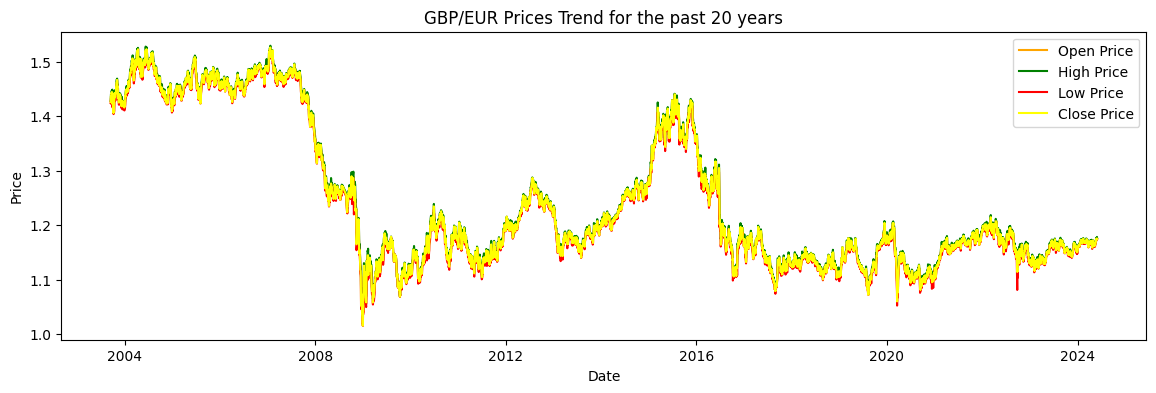

In [17]:
plt.figure(figsize=(14, 4))

# Plotting each price type as a line
plt.plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['Open'], label='Open Price', color='orange', linewidth=1.5)
plt.plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['High'], label='High Price', color='green', linewidth=1.5)
plt.plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['Low'], label='Low Price', color='red', linewidth=1.5)
plt.plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['Close'], label='Close Price', color='yellow', linewidth=1.5)

# title and x and y labels
plt.title('GBP/EUR Prices Trend for the past 20 years')
plt.xlabel('Date')
plt.ylabel('Price')

# legend
plt.legend()

plt.show()


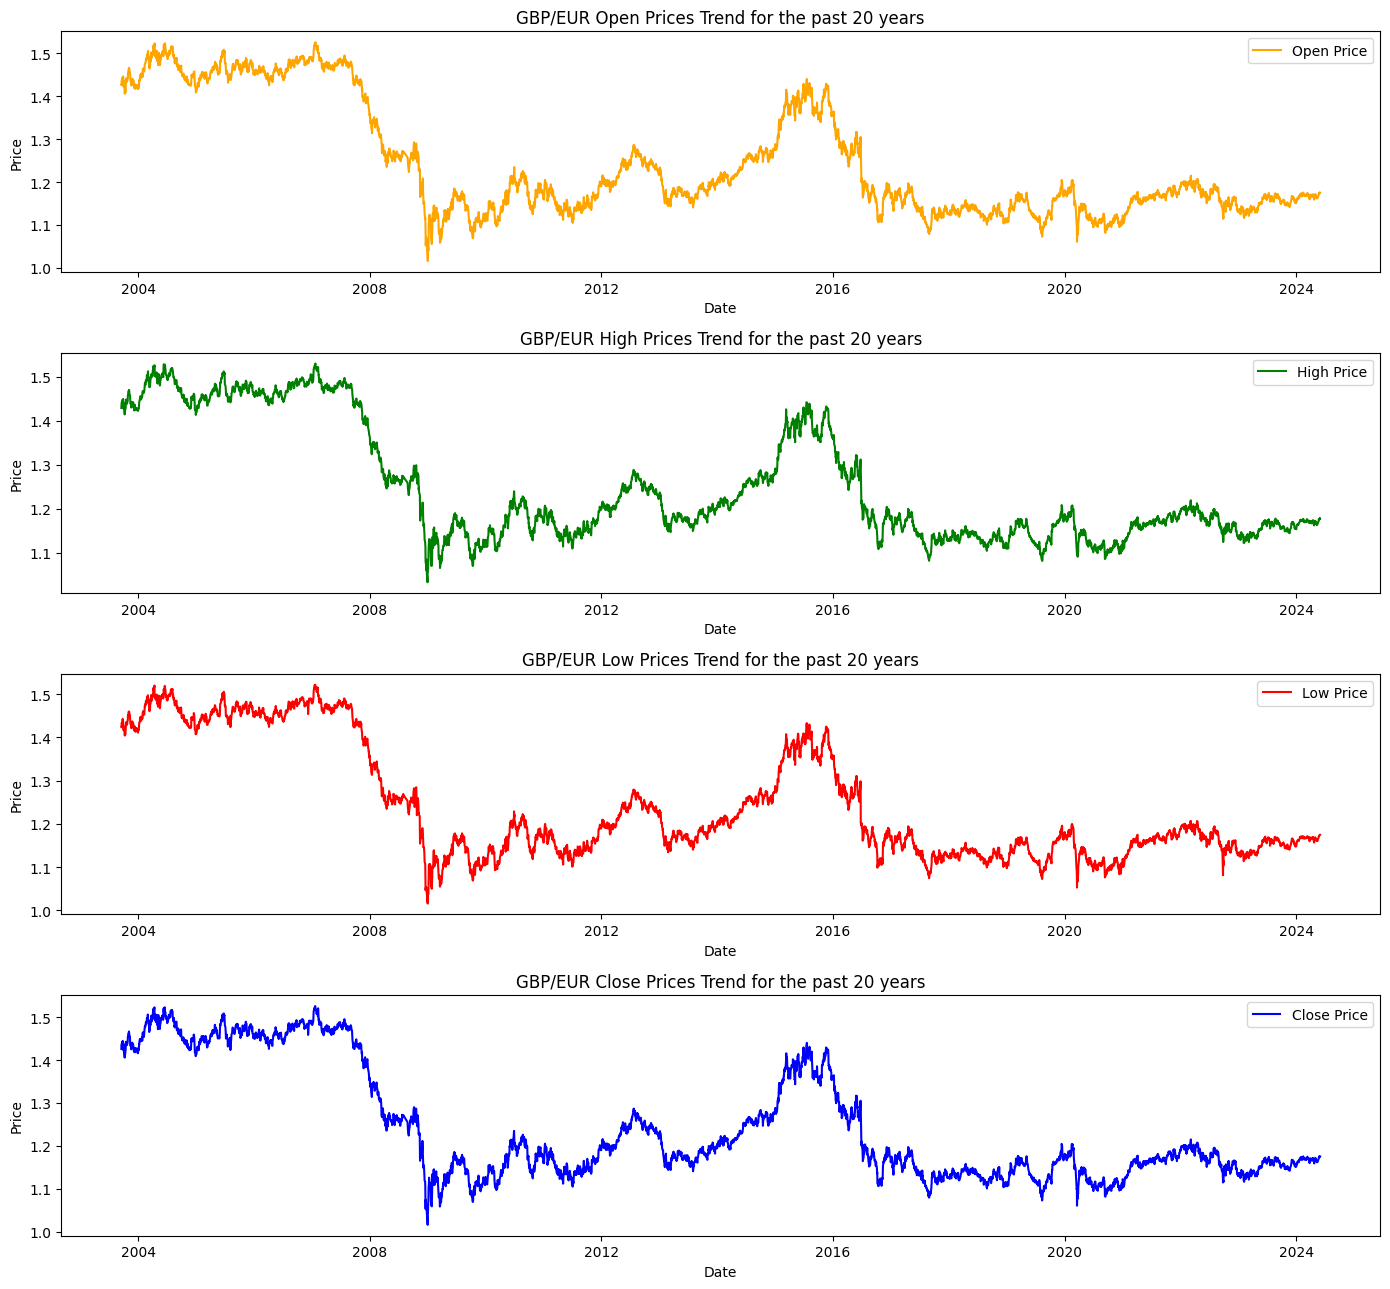

In [18]:
# Create a figure with 4 subplots without sharing x-axis
fig, axs = plt.subplots(4, 1, figsize=(14, 13), sharex=False)

# Plot 'Open' prices
axs[0].plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['Open'], label='Open Price', color='orange')
axs[0].set_title('GBP/EUR Open Prices Trend for the past 20 years')
axs[0].set_ylabel('Price')
axs[0].set_xlabel('Date')
axs[0].legend()

# Plot 'High' prices
axs[1].plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['High'], label='High Price', color='green')
axs[1].set_title('GBP/EUR High Prices Trend for the past 20 years')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('Date')
axs[1].legend()

# Plot 'Low' prices
axs[2].plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['Low'], label='Low Price', color='red')
axs[2].set_title('GBP/EUR Low Prices Trend for the past 20 years')
axs[2].set_ylabel('Price')
axs[2].set_xlabel('Date')
axs[2].legend()

# Plot 'Close' prices
axs[3].plot(cleaned_forex_data_f['Date'], cleaned_forex_data_f['Close'], label='Close Price', color='blue')
axs[3].set_title('GBP/EUR Close Prices Trend for the past 20 years')
axs[3].set_ylabel('Price')
axs[3].set_xlabel('Date')
axs[3].legend()

#padding subplots
plt.tight_layout()

plt.show()



**Visualizing each price to get better perspective on each price trend.**

All four plots show a similar pattern of price movement, indicating that the prices are correlated.
There are significant fluctuations in prices around the 2008 due to financial crisis. After 2016, there is a notable downward trend, followed by a stabilization in recent years.
The charts highlighting the substantial impact of the global financial turmoil on the GBP/EUR currency pair.

**Checking the distribution of the Prices**

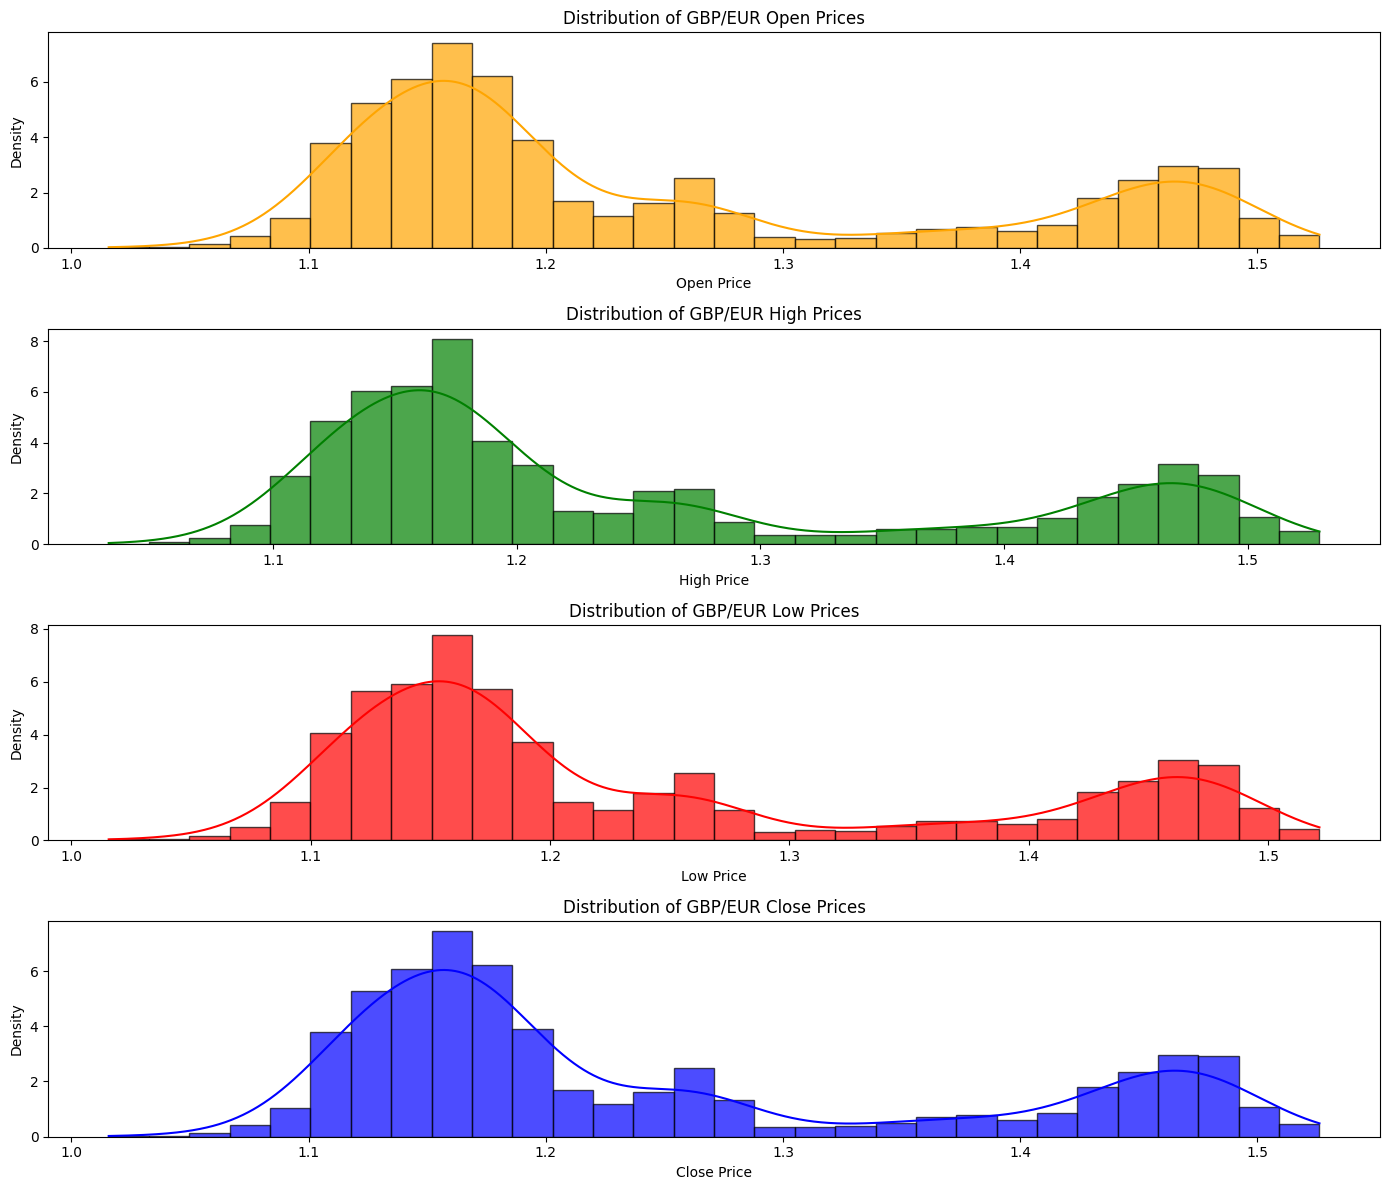

In [19]:
# Figure for the subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 12))

# Plot histogram and KDE for Open prices
axs[0].hist(cleaned_forex_data_f['Open'], bins=30, color='orange', edgecolor='black', alpha=0.7, density=True)
kde_open = gaussian_kde(cleaned_forex_data_f['Open'])
x_open = np.linspace(cleaned_forex_data_f['Open'].min(), cleaned_forex_data_f['Open'].max(), 1000)
axs[0].plot(x_open, kde_open(x_open), color='orange')
axs[0].set_title('Distribution of GBP/EUR Open Prices')
axs[0].set_xlabel('Open Price')
axs[0].set_ylabel('Density')

# Plot histogram and KDE for High prices
axs[1].hist(cleaned_forex_data_f['High'], bins=30, color='green', edgecolor='black', alpha=0.7, density=True)
kde_high = gaussian_kde(cleaned_forex_data_f['High'])
x_high = np.linspace(cleaned_forex_data_f['High'].min(), cleaned_forex_data_f['High'].max(), 1000)
axs[1].plot(x_high, kde_high(x_high), color='green')
axs[1].set_title('Distribution of GBP/EUR High Prices')
axs[1].set_xlabel('High Price')
axs[1].set_ylabel('Density')

# Plot histogram and KDE for Low prices
axs[2].hist(cleaned_forex_data_f['Low'], bins=30, color='red', edgecolor='black', alpha=0.7, density=True)
kde_low = gaussian_kde(cleaned_forex_data_f['Low'])
x_low = np.linspace(cleaned_forex_data_f['Low'].min(), cleaned_forex_data_f['Low'].max(), 1000)
axs[2].plot(x_low, kde_low(x_low), color='red')
axs[2].set_title('Distribution of GBP/EUR Low Prices')
axs[2].set_xlabel('Low Price')
axs[2].set_ylabel('Density')

# Plot histogram and KDE for Close prices
axs[3].hist(cleaned_forex_data_f['Close'], bins=30, color='blue', edgecolor='black', alpha=0.7, density=True)
kde_close = gaussian_kde(cleaned_forex_data_f['Close'])
x_close = np.linspace(cleaned_forex_data_f['Close'].min(), cleaned_forex_data_f['Close'].max(), 1000)
axs[3].plot(x_close, kde_close(x_close), color='blue')
axs[3].set_title('Distribution of GBP/EUR Close Prices')
axs[3].set_xlabel('Close Price')
axs[3].set_ylabel('Density')

# Applying paading to the sub plots
plt.tight_layout()

# Show the plot
plt.show()


All histograms show a bimodal distribution(2 peaks)

The first peak is between 1.1 and 1.2 and is slightly skewed to the right.
The second peak is between 1.4 and 1.5 and appears to be more symmetric(like a normal distribution).



**Incorporating Technical Indicators to the dataset to increase the robustness of the models for better predictive capabilities.**

In [20]:
# Exponential Moving Average (EMA) with periods of 50 and 200 to address both short-term and long-term trends.

def calculate_ema(data_f, span):
    """
    Calculate the Exponential Moving Average (EMA).

    Parameters:
    data_f (pandas DataFrame): The original dataframe.
    span (int): The span for the EMA.

    Returns:
    pandas Series: The EMA of the close prices.
    """
    return data_f['Close'].ewm(span=span, adjust=False).mean()

# Calculate EMA 50 and EMA 200
cleaned_forex_data_f.loc[:,'EMA_50'] = calculate_ema(cleaned_forex_data_f, span=50)
cleaned_forex_data_f.loc[:,'EMA_200'] = calculate_ema(cleaned_forex_data_f, span=200)



# Moving Average Convergence Divergence (MACD) to analyze both short-term and long-term market momentum
def compute_macd(data_f, short_span=12, long_span=26, signal_span=9):
    """
    Calculate the MACD, Signal Line, and MACD Histogram.

    Parameters:
    data_f (pandas DataFrame): The original dataframe.
    short_span (int): The span for the short term's EMA.
    long_span (int): The span for the long term's EMA.
    signal_span (int): The span for the line of the signal.

    Returns:
    pandas DataFrame: MACD, Signal line, and MACD Histogram.
    """
    ri_short_ema = data_f['Close'].ewm(span=short_span, adjust=False).mean()
    ri_long_ema = data_f['Close'].ewm(span=long_span, adjust=False).mean()
    ri_macd = ri_short_ema - ri_long_ema
    ri_signals = ri_macd.ewm(span=signal_span, adjust=False).mean()
    ri_macd_histogram = ri_macd - ri_signals
    return pd.DataFrame({'MACD': ri_macd, 'Signal': ri_signals, 'MACD_Histogram': ri_macd_histogram})

# Calculate MACD, Signal Line, and MACD Histogram
macd_data_f = compute_macd(cleaned_forex_data_f)

# Add these components to the original DataFrame
cleaned_forex_data_f.loc[:,'MACD'] = macd_data_f['MACD']
cleaned_forex_data_f.loc[:, 'MACD_Signal'] = macd_data_f['Signal']
cleaned_forex_data_f.loc[:,'MACD_Histogram'] = macd_data_f['MACD_Histogram']



# Relative Strength Index (RSI) to evaluate market strength and momentum.
def compute_rsi(data_f, window=14):
    ri_rsi_delta = data_f['Close'].diff()
    ri_rsi_gain = (ri_rsi_delta.where(ri_rsi_delta > 0, 0)).rolling(window=window).mean()
    ri_rsi_loss = (-ri_rsi_delta.where(ri_rsi_delta < 0, 0)).rolling(window=window).mean()
    ri_rs = ri_rsi_gain / ri_rsi_loss
    ri_rsi = 100 - (100 / (1 + ri_rs))
    return ri_rsi

# Calculate RSI
cleaned_forex_data_f.loc[:,'RSI'] = compute_rsi(cleaned_forex_data_f)



#Average Directional Index (ADX) to measure market trend strength.
def calculate_adx(data_f, window=14):
    """
    Calculate the Average Directional Index (ADX).

    Parameters:
    data_f (pandas DataFrame): The original dataframe.
    window (int): The period for calculating the ADX.

    Returns:
    pandas DataFrame: The ADX, plus directional indicator (DI+), and minus directional indicator (DI-).
    """
    ri_adx_high = data_f['High']
    ri_adx_low = data_f['Low']
    ri_adx_close = data_f['Close']

    # Calculate True Range (TR)
    ri_true_range_1 = ri_adx_high - ri_adx_low
    ri_true_range_2 = abs(ri_adx_high -  ri_adx_close.shift(1))
    ri_true_range_3 = abs(ri_adx_low-  ri_adx_close.shift(1))
    ri_true_range = pd.concat([ri_true_range_1, ri_true_range_2, ri_true_range_3], axis=1).max(axis=1)

    # Calculate directional movements
    ri_dm_plus = ri_adx_high.diff()
    ri_dm_minus = ri_adx_low.diff()

    ri_dm_plus[ri_dm_plus < 0] = 0
    ri_dm_minus[ri_dm_minus > 0] = 0

    # Smooth the TR, plus_dm, and minus_dm
    atr = ri_true_range.rolling(window=window, min_periods=1).mean()
    ri_adx_plus_di = 100 * (ri_dm_plus.ewm(alpha=1/window).mean() / atr)
    ri_adx_minus_di = abs(100 * (ri_dm_minus.ewm(alpha=1/window).mean() / atr))

    # Calculate the DX and ADX
    ri_dx = (abs(ri_adx_plus_di - ri_adx_minus_di) / (ri_adx_plus_di + ri_adx_minus_di)) * 100
    ri_adx = ri_dx.ewm(alpha=1/window).mean()

    return pd.DataFrame({'ADX': ri_adx, 'Plus_DI': ri_adx_plus_di, 'Minus_DI':ri_adx_minus_di})

# Calculate ADX, Plus_DI, and Minus_DI
adx_data_f = calculate_adx(cleaned_forex_data_f)

# Add these components to the original DataFrame
cleaned_forex_data_f.loc[:,'ADX'] = adx_data_f['ADX']
cleaned_forex_data_f.loc[:,'Plus_DI'] = adx_data_f['Plus_DI']
cleaned_forex_data_f.loc[:,'Minus_DI'] = adx_data_f['Minus_DI']

# Drop rows with NaN value at the beginning of the dataset
cleaned_forex_data_f.dropna(inplace=True)


# show the first five rows of the cleaned_forex_data_f to check the dropped rows
cleaned_forex_data_f.head()

Date    Open    High     Low   Close    EMA_50   EMA_200      MACD  \
13 2003-10-06  1.4362  1.4386  1.4243  1.4257  1.429398  1.427151  0.000650   
14 2003-10-07  1.4251  1.4304  1.4098  1.4114  1.428692  1.426995 -0.001002   
15 2003-10-08  1.4116  1.4139  1.4046  1.4059  1.427798  1.426785 -0.002724   
16 2003-10-09  1.4061  1.4229  1.4040  1.4192  1.427461  1.426709 -0.002980   
17 2003-10-10  1.4190  1.4203  1.4083  1.4102  1.426784  1.426545 -0.003866   

    MACD_Signal  MACD_Histogram        RSI        ADX    Plus_DI   Minus_DI  
13     0.001744       -0.001094  49.722222  50.072265  25.210758  21.799990  
14     0.001194       -0.002197  41.483198  46.927863  20.239342  31.423958  
15     0.000411       -0.003135  30.778739  45.023083  18.663290  33.935317  
16    -0.000267       -0.002713  40.425532  41.486838  23.375060  28.942339  
17    -0.000987       -0.002879  37.328094  38.410960  20.517102  25.403697

In [21]:
#Display shape of dataset
cleaned_forex_data_f.shape

(5360, 14)

**Filtering the data set to the last three years for better visualisation of the indicators.**

In [22]:
# Filter data for the past three years
three_years_prices = cleaned_forex_data_f['Date'].max() - pd.DateOffset(years=3)
data_f_last_three_years = cleaned_forex_data_f[cleaned_forex_data_f['Date'] >= three_years_prices]
data_f_last_three_years.head()

Date     Open     High      Low    Close    EMA_50   EMA_200  \
4618 2021-05-31  1.16310  1.16388  1.16050  1.16314  1.157217  1.139960   
4619 2021-06-01  1.16282  1.16447  1.15640  1.16296  1.157443  1.140189   
4620 2021-06-02  1.15846  1.16265  1.15757  1.15853  1.157485  1.140372   
4621 2021-06-03  1.16063  1.16453  1.15985  1.16056  1.157606  1.140572   
4622 2021-06-04  1.16288  1.16733  1.16250  1.16300  1.157817  1.140796   

          MACD  MACD_Signal  MACD_Histogram        RSI        ADX    Plus_DI  \
4618  0.001130     0.000848        0.000283  48.898116  12.151276  26.123530   
4619  0.001270     0.000932        0.000338  48.553259  11.503596  24.085034   
4620  0.001012     0.000948        0.000064  42.171717  10.902179  22.123734   
4621  0.000960     0.000951        0.000010  46.675787  10.713689  22.580354   
4622  0.001103     0.000981        0.000122  53.483269  11.056005  23.667516   

       Minus_DI  
4618  19.765260  
4619  22.644024  
4620  20.800069  
4621  19.133413  
4622  17.313026

**Plots of the four technical indicators used in the study**

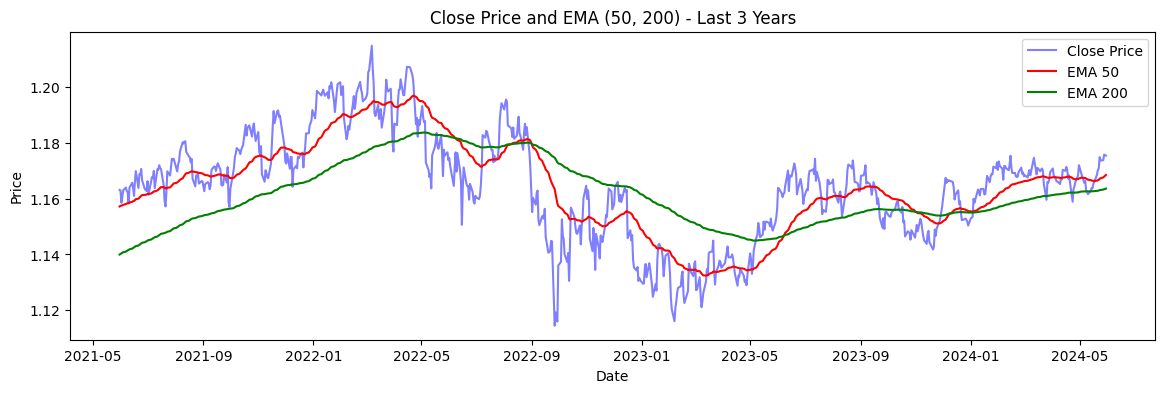

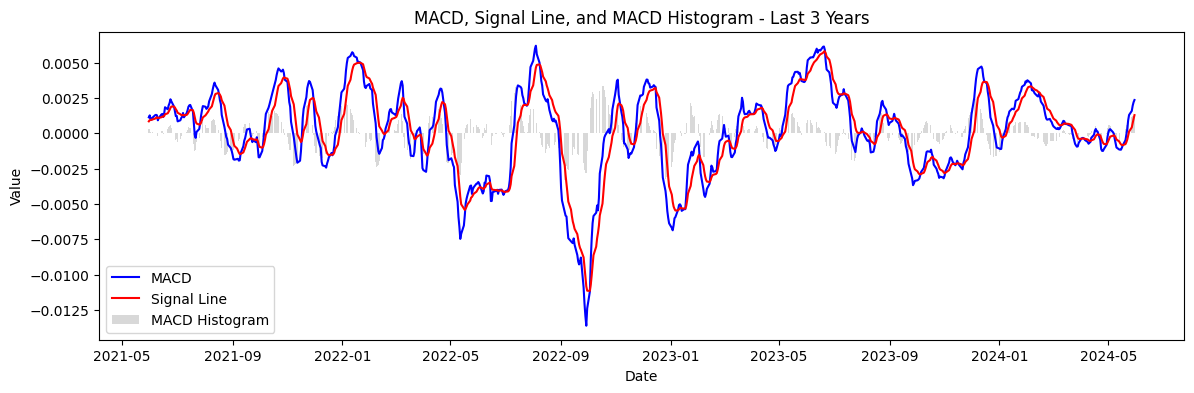

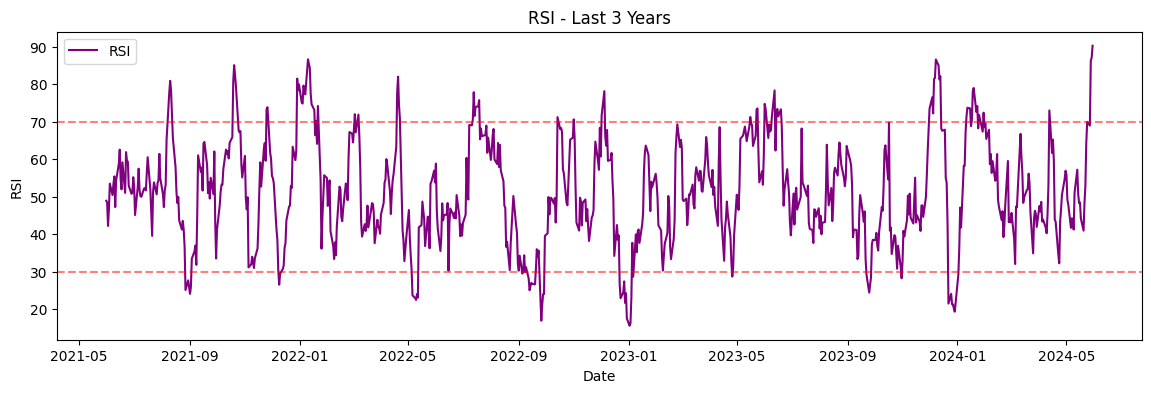

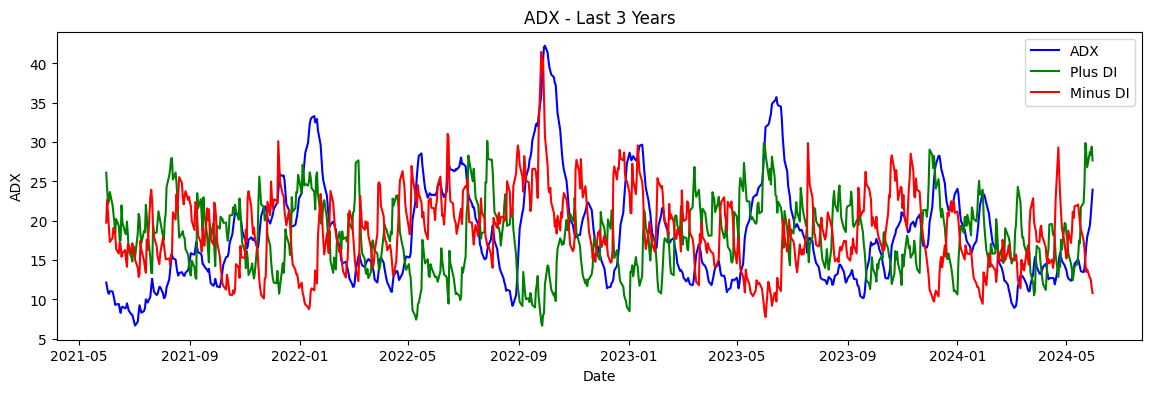

In [23]:
# Plot EMA
def plot_ema(data_f):
    """
    Plot the closing price along with EMA 50 and EMA 200.

    Parameters:
    data_f (DataFrame): DataFrame with 'Date', 'Close', 'EMA_50', and 'EMA_200' columns.
    """
    plt.figure(figsize=(14, 4))
    plt.plot(data_f['Date'], data_f['Close'], label='Close Price', c='blue', alpha=0.5)
    plt.plot(data_f['Date'], data_f['EMA_50'], label='EMA 50', c='red')
    plt.plot(data_f['Date'], data_f['EMA_200'], label='EMA 200', c='green')
    plt.title('Close Price and EMA (50, 200) - Last 3 Years')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_ema(data_f_last_three_years)

# Plot MACD
def plot_macd(data_f):
    """
    Plot MACD, Signal Line, and MACD Histogram.

    Parameters:
    data_f (DataFrame): DataFrame with 'Date', 'MACD', 'MACD_Signal', and 'MACD_Histogram' columns.
    """
    plt.figure(figsize=(14, 4))
    plt.plot(data_f['Date'], data_f['MACD'], label='MACD', c='blue')
    plt.plot(data_f['Date'], data_f['MACD_Signal'], label='Signal Line', c='red')
    plt.bar(data_f['Date'], data_f['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.3)
    plt.title('MACD, Signal Line, and MACD Histogram - Last 3 Years')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_macd(data_f_last_three_years)

# Plot RSI
def plot_rsi(data_f):
    """
    Plot the RSI with overbought and oversold lines.

    Parameters:
    data_f (DataFrame): DataFrame with 'Date' and 'RSI' columns.
    """
    plt.figure(figsize=(14, 4))
    plt.plot(data_f['Date'], data_f['RSI'], label='RSI', color='purple')
    plt.axhline(30, linestyle='--', alpha=0.5, color='red')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.title('RSI - Last 3 Years')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

plot_rsi(data_f_last_three_years)

# Plot ADX
def plot_adx(data_f):
    """
    Plot the ADX.

    Parameters:
    data_f (DataFrame): DataFrame with 'Date' and 'ADX' columns.
    """
    plt.figure(figsize=(14, 4))
    plt.plot(data_f['Date'], data_f['ADX'], label='ADX', c='blue')
    plt.plot(data_f['Date'], data_f['Plus_DI'], label='Plus DI', c='green')
    plt.plot(data_f['Date'], data_f['Minus_DI'], label='Minus DI', c='red')
    plt.title('ADX - Last 3 Years')
    plt.xlabel('Date')
    plt.ylabel('ADX')
    plt.legend()
    plt.show()

plot_adx(data_f_last_three_years)


**Checking out relationships between Prices and Indictors using correlation map and Corner plot.**

Correlation Matrix

In [24]:
ri_indicators = cleaned_forex_data_f[['Open','Close', 'High', 'Low', 'EMA_50', 'EMA_200', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'RSI', 'ADX', 'Plus_DI', 'Minus_DI']]

# Calculate the correlation matrix
ri_correlatn_matrix = ri_indicators.corr()

# Display the correlation matrix
ri_correlatn_matrix


Open     Close      High       Low    EMA_50   EMA_200  \
Open            1.000000  0.999599  0.999575  0.999504  0.989441  0.955766   
Close           0.999599  1.000000  0.999564  0.999531  0.989092  0.955349   
High            0.999575  0.999564  1.000000  0.999338  0.989732  0.956914   
Low             0.999504  0.999531  0.999338  1.000000  0.988697  0.954224   
EMA_50          0.989441  0.989092  0.989732  0.988697  1.000000  0.979773   
EMA_200         0.955766  0.955349  0.956914  0.954224  0.979773  1.000000   
MACD            0.106554  0.107607  0.102799  0.108630 -0.029805 -0.111594   
MACD_Signal     0.111503  0.111537  0.107504  0.113200 -0.011962 -0.109808   
MACD_Histogram  0.007085  0.010316  0.007042  0.008630 -0.058905 -0.028051   
RSI             0.067560  0.071408  0.066714  0.070012 -0.037607 -0.066882   
ADX             0.083503  0.082768  0.087726  0.079412  0.129580  0.170346   
Plus_DI         0.042413  0.045733  0.045250  0.047265 -0.054184 -0.076282   
Minus_DI       -0.057127 -0.060480 -0.059134 -0.062775  0.044490  0.099267   

                    MACD  MACD_Signal  MACD_Histogram       RSI       ADX  \
Open            0.106554     0.111503        0.007085  0.067560  0.083503   
Close           0.107607     0.111537        0.010316  0.071408  0.082768   
High            0.102799     0.107504        0.007042  0.066714  0.087726   
Low             0.108630     0.113200        0.008630  0.070012  0.079412   
EMA_50         -0.029805    -0.011962       -0.058905 -0.037607  0.129580   
EMA_200        -0.111594    -0.109808       -0.028051 -0.066882  0.170346   
MACD            1.000000     0.948852        0.355415  0.687510 -0.325195   
MACD_Signal     0.948852     1.000000        0.042129  0.495578 -0.335454   
MACD_Histogram  0.355415     0.042129        1.000000  0.708469 -0.035965   
RSI             0.687510     0.495578        0.708469  1.000000 -0.146697   
ADX            -0.325195    -0.335454       -0.035965 -0.146697  1.000000   
Plus_DI         0.608050     0.480071        0.502925  0.678265 -0.174072   
Minus_DI       -0.633788    -0.523278       -0.456454 -0.657802  0.164781   

                 Plus_DI  Minus_DI  
Open            0.042413 -0.057127  
Close           0.045733 -0.060480  
High            0.045250 -0.059134  
Low             0.047265 -0.062775  
EMA_50         -0.054184  0.044490  
EMA_200        -0.076282  0.099267  
MACD            0.608050 -0.633788  
MACD_Signal     0.480071 -0.523278  
MACD_Histogram  0.502925 -0.456454  
RSI             0.678265 -0.657802  
ADX            -0.174072  0.164781  
Plus_DI         1.000000 -0.360333  
Minus_DI       -0.360333  1.000000

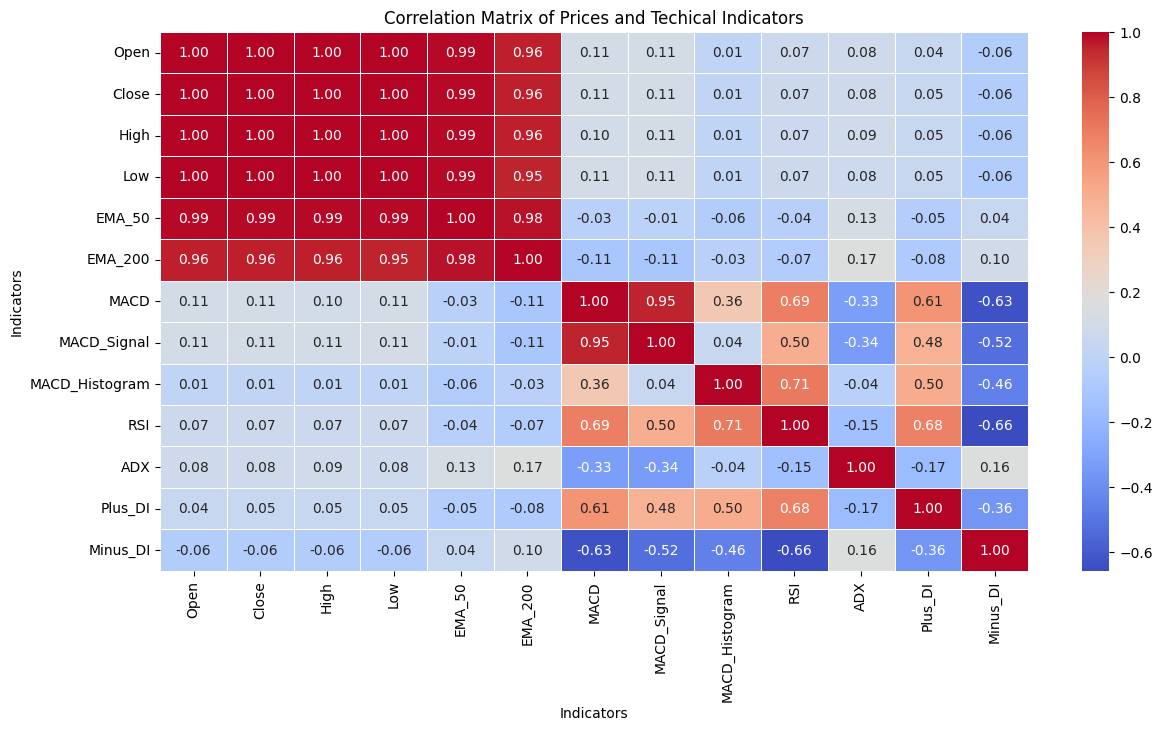

In [25]:
# matplotlib figure
plt.figure(figsize=(14, 7))

# Drawing of the heatmap with the correlation matrix
sns.heatmap(ri_correlatn_matrix, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot=True)

plt.title('Correlation Matrix of Prices and Techical Indicators')
plt.xlabel('Indicators')
plt.ylabel('Indicators')
plt.show()


Corner plot

<Figure size 800x500 with 0 Axes>

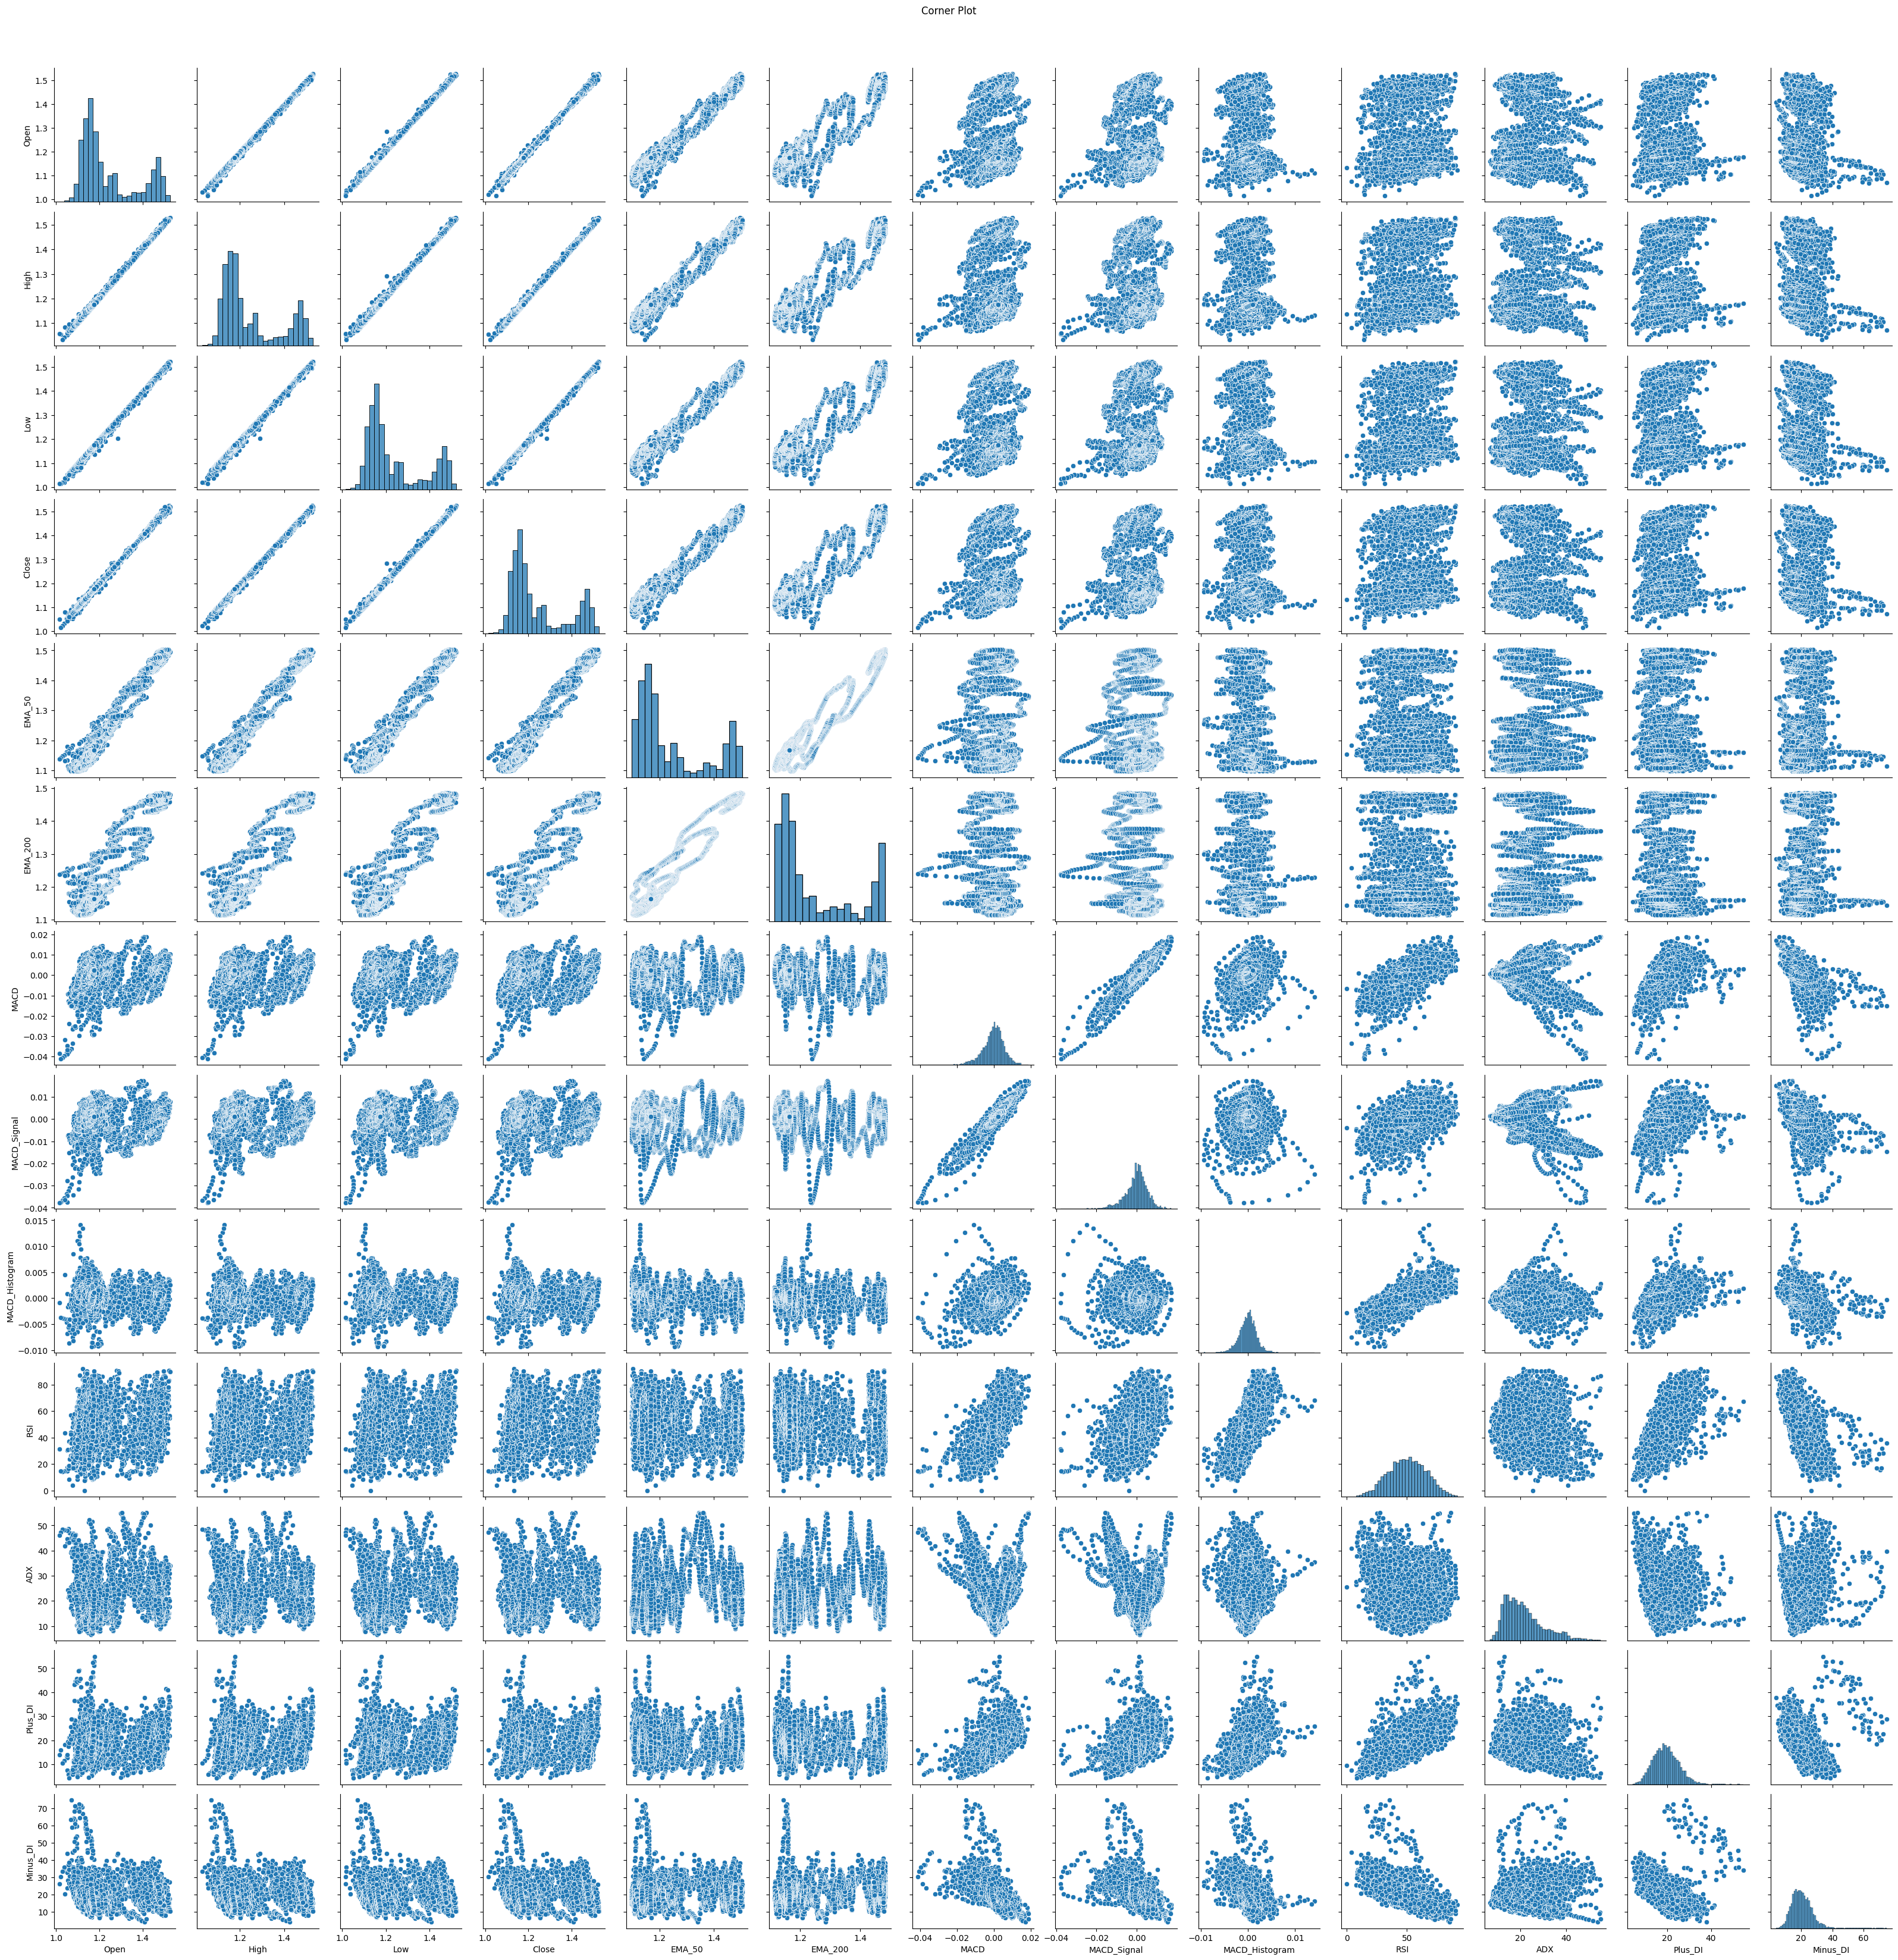

In [26]:
# Generate corner plot to show relationships and distributions of prices and indicators
fig = plt.figure(figsize=(8, 5))
ri_corner_plot = sns.pairplot(cleaned_forex_data_f)
ri_corner_plot.fig.suptitle('Corner Plot', y=1.02)
plt.show()

In [27]:
#check the first five rows of the dataframe
cleaned_forex_data_f.head()

Date    Open    High     Low   Close    EMA_50   EMA_200      MACD  \
13 2003-10-06  1.4362  1.4386  1.4243  1.4257  1.429398  1.427151  0.000650   
14 2003-10-07  1.4251  1.4304  1.4098  1.4114  1.428692  1.426995 -0.001002   
15 2003-10-08  1.4116  1.4139  1.4046  1.4059  1.427798  1.426785 -0.002724   
16 2003-10-09  1.4061  1.4229  1.4040  1.4192  1.427461  1.426709 -0.002980   
17 2003-10-10  1.4190  1.4203  1.4083  1.4102  1.426784  1.426545 -0.003866   

    MACD_Signal  MACD_Histogram        RSI        ADX    Plus_DI   Minus_DI  
13     0.001744       -0.001094  49.722222  50.072265  25.210758  21.799990  
14     0.001194       -0.002197  41.483198  46.927863  20.239342  31.423958  
15     0.000411       -0.003135  30.778739  45.023083  18.663290  33.935317  
16    -0.000267       -0.002713  40.425532  41.486838  23.375060  28.942339  
17    -0.000987       -0.002879  37.328094  38.410960  20.517102  25.403697

In [28]:
# Confirm shape of the cleaned data set.
cleaned_forex_data_f.shape

(5360, 14)

In [29]:
# Check for null values on the cleaned dataset.
cleaned_forex_data_f.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
EMA_50            0
EMA_200           0
MACD              0
MACD_Signal       0
MACD_Histogram    0
RSI               0
ADX               0
Plus_DI           0
Minus_DI          0
dtype: int64

**Adding 1000 more sample points using the jittering method of Augmentation to enhance the robustness of the GRU model.**

In [30]:
# Function to add data points to the original data in form of noise
def jitter(data, noise_level=0.01):
    """
    Add random noise to the data.

    This function introduces variability into the data by adding random noise,
    which can help in augmenting the dataset to make the model more robust.

    Parameters:
    data (numpy array): Numeric data to which noise will be added.
    noise_level (float): The std of the normal distribution used to generate the noise.

    Returns:
    numpy array: Data with added noise.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise


# Function to resample and jitter noise.
def resample_and_jitter(data_f, n_samples):
    """
    Resample the dataframe and add jitter (random noise) to the numeric columns.

    This function increases the size of the dataset by resampling with replacement and
    adding jitter to numeric columns. This augmentation technique helps in creating
    additional synthetic data points, which can improve the training of models
    by providing more varied data.

    Parameters:
    data_f (DataFrame): The input dataframe to be resampled and jittered.
    n_samples (int): samples number to draw with replacement from the dataframe.

    Returns:
    DataFrame: Resampled dataframe with added jitter to numeric columns.
    """

    # Resample the dataframe with replacement
    resampled_data_f = data_f.sample(n=n_samples, replace=True).reset_index(drop=True)
    for column in resampled_data_f.select_dtypes(include=[np.number]).columns:
        resampled_data_f[column] = jitter(resampled_data_f[column].values)
    return resampled_data_f

# Number of additional samples to generate
additional_samples = 1000

# Generate additional samples
data_f_resampled = resample_and_jitter(cleaned_forex_data_f, additional_samples)

# Combine the original and resampled dataframes
augmented_data_f = pd.concat([cleaned_forex_data_f, data_f_resampled], ignore_index=True)
augmented_data_f.head()

Date    Open    High     Low   Close    EMA_50   EMA_200      MACD  \
0 2003-10-06  1.4362  1.4386  1.4243  1.4257  1.429398  1.427151  0.000650   
1 2003-10-07  1.4251  1.4304  1.4098  1.4114  1.428692  1.426995 -0.001002   
2 2003-10-08  1.4116  1.4139  1.4046  1.4059  1.427798  1.426785 -0.002724   
3 2003-10-09  1.4061  1.4229  1.4040  1.4192  1.427461  1.426709 -0.002980   
4 2003-10-10  1.4190  1.4203  1.4083  1.4102  1.426784  1.426545 -0.003866   

   MACD_Signal  MACD_Histogram        RSI        ADX    Plus_DI   Minus_DI  
0     0.001744       -0.001094  49.722222  50.072265  25.210758  21.799990  
1     0.001194       -0.002197  41.483198  46.927863  20.239342  31.423958  
2     0.000411       -0.003135  30.778739  45.023083  18.663290  33.935317  
3    -0.000267       -0.002713  40.425532  41.486838  23.375060  28.942339  
4    -0.000987       -0.002879  37.328094  38.410960  20.517102  25.403697

In [31]:
# Verify the dimensions of the augmented dataset to ensure correct augmentation
augmented_data_f.shape

(6360, 14)

In [32]:
# Get summary statistics of the augmented data
augmented_data_f.describe()

Date         Open         High          Low  \
count                           6360  6360.000000  6360.000000  6360.000000   
mean   2014-02-12 23:51:37.358490624     1.242557     1.246461     1.238292   
min              2003-10-06 00:00:00     1.015700     1.032400     1.015700   
25%              2009-01-15 18:00:00     1.145827     1.149479     1.141000   
50%              2014-02-08 12:00:00     1.181375     1.185420     1.177335   
75%              2019-04-26 18:00:00     1.346400     1.350850     1.341452   
max              2024-05-30 00:00:00     1.529729     1.530811     1.521457   
std                              NaN     0.130562     0.130610     0.130366   

             Close       EMA_50      EMA_200         MACD  MACD_Signal  \
count  6360.000000  6360.000000  6360.000000  6360.000000  6360.000000   
mean      1.242393     1.243449     1.247093    -0.000268    -0.000197   
min       1.015700     1.078972     1.098818    -0.057777    -0.043088   
25%       1.145887     1.145572     1.149658    -0.003868    -0.003507   
50%       1.181205     1.178337     1.182055     0.000273     0.000370   
75%       1.346425     1.357309     1.351297     0.003860     0.003606   
max       1.529323     1.522206     1.501285     0.035725     0.038732   
std       0.130432     0.129535     0.126131     0.007521     0.007028   

       MACD_Histogram          RSI          ADX      Plus_DI     Minus_DI  
count     6360.000000  6360.000000  6360.000000  6360.000000  6360.000000  
mean         0.000051    50.373054    21.504337    19.534197    20.594603  
min         -0.028623     0.000000     6.682093     4.265865     3.974481  
25%         -0.001318    39.340127    15.031944    15.309672    15.934457  
50%          0.000063    50.586019    19.755189    19.137441    19.840137  
75%          0.001333    61.663956    25.843208    23.288312    24.235827  
max          0.033946    92.187500    55.128315    54.906334    74.671398  
std          0.004346    15.598952     8.458367     6.035852     7.026280

In [33]:
cleaned_forex_data_f.describe()

Date         Open         High          Low  \
count                           5360  5360.000000  5360.000000  5360.000000   
mean   2014-02-10 21:24:10.746268672     1.242401     1.246415     1.238243   
min              2003-10-06 00:00:00     1.015700     1.032400     1.015700   
25%              2008-12-29 18:00:00     1.145595     1.149495     1.141300   
50%              2014-02-18 12:00:00     1.181495     1.185655     1.177590   
75%              2019-04-11 06:00:00     1.346400     1.350850     1.340793   
max              2024-05-30 00:00:00     1.526200     1.529500     1.521400   
std                              NaN     0.130136     0.130218     0.129980   

             Close       EMA_50      EMA_200         MACD  MACD_Signal  \
count  5360.000000  5360.000000  5360.000000  5360.000000  5360.000000   
mean      1.242376     1.243569     1.247268    -0.000343    -0.000342   
min       1.015700     1.097439     1.114595    -0.041236    -0.037740   
25%       1.145600     1.145794     1.149658    -0.003378    -0.003174   
50%       1.181555     1.178362     1.182035     0.000289     0.000324   
75%       1.346425     1.358130     1.353951     0.003482     0.003159   
max       1.526200     1.503794     1.484090     0.018794     0.017209   
std       0.130102     0.129137     0.126100     0.006272     0.005868   

       MACD_Histogram          RSI          ADX      Plus_DI     Minus_DI  
count    5.360000e+03  5360.000000  5360.000000  5360.000000  5360.000000  
mean    -5.443901e-07    50.275171    21.524771    19.515974    20.667871  
min     -9.353089e-03     0.000000     6.682093     4.272195     3.974481  
25%     -1.102898e-03    39.191987    15.038272    15.265371    15.965960  
50%      5.897261e-05    50.408761    19.747609    19.147867    19.897931  
75%      1.146611e-03    61.664131    25.836343    23.243162    24.280666  
max      1.413437e-02    92.187500    55.128315    54.906334    74.671398  
std      1.981974e-03    15.650205     8.496628     6.049170     7.075659

**Visualisation of the original and Augmented datasets.**

In [34]:
# Filter data for the past three years to enhance visualisation comparison.

# Filter the original data for the past three years
three_years_prices = cleaned_forex_data_f['Date'].max() - pd.DateOffset(years=3)
data_f_last_three_years = cleaned_forex_data_f[cleaned_forex_data_f['Date'] >= three_years_prices]
data_f_last_three_years.head()

Date     Open     High      Low    Close    EMA_50   EMA_200  \
4618 2021-05-31  1.16310  1.16388  1.16050  1.16314  1.157217  1.139960   
4619 2021-06-01  1.16282  1.16447  1.15640  1.16296  1.157443  1.140189   
4620 2021-06-02  1.15846  1.16265  1.15757  1.15853  1.157485  1.140372   
4621 2021-06-03  1.16063  1.16453  1.15985  1.16056  1.157606  1.140572   
4622 2021-06-04  1.16288  1.16733  1.16250  1.16300  1.157817  1.140796   

          MACD  MACD_Signal  MACD_Histogram        RSI        ADX    Plus_DI  \
4618  0.001130     0.000848        0.000283  48.898116  12.151276  26.123530   
4619  0.001270     0.000932        0.000338  48.553259  11.503596  24.085034   
4620  0.001012     0.000948        0.000064  42.171717  10.902179  22.123734   
4621  0.000960     0.000951        0.000010  46.675787  10.713689  22.580354   
4622  0.001103     0.000981        0.000122  53.483269  11.056005  23.667516   

       Minus_DI  
4618  19.765260  
4619  22.644024  
4620  20.800069  
4621  19.133413  
4622  17.313026

In [35]:
# Filter the augmented data for the past three years
three_years_augmented_prices = augmented_data_f['Date'].max() - pd.DateOffset(years=3)
augmented_data_f_last_three_years = augmented_data_f[augmented_data_f['Date'] >= three_years_prices]
augmented_data_f_last_three_years.head()

Date     Open     High      Low    Close    EMA_50   EMA_200  \
4576 2021-05-31  1.16310  1.16388  1.16050  1.16314  1.157217  1.139960   
4577 2021-06-01  1.16282  1.16447  1.15640  1.16296  1.157443  1.140189   
4578 2021-06-02  1.15846  1.16265  1.15757  1.15853  1.157485  1.140372   
4579 2021-06-03  1.16063  1.16453  1.15985  1.16056  1.157606  1.140572   
4580 2021-06-04  1.16288  1.16733  1.16250  1.16300  1.157817  1.140796   

          MACD  MACD_Signal  MACD_Histogram        RSI        ADX    Plus_DI  \
4576  0.001130     0.000848        0.000283  48.898116  12.151276  26.123530   
4577  0.001270     0.000932        0.000338  48.553259  11.503596  24.085034   
4578  0.001012     0.000948        0.000064  42.171717  10.902179  22.123734   
4579  0.000960     0.000951        0.000010  46.675787  10.713689  22.580354   
4580  0.001103     0.000981        0.000122  53.483269  11.056005  23.667516   

       Minus_DI  
4576  19.765260  
4577  22.644024  
4578  20.800069  
4579  19.133413  
4580  17.313026

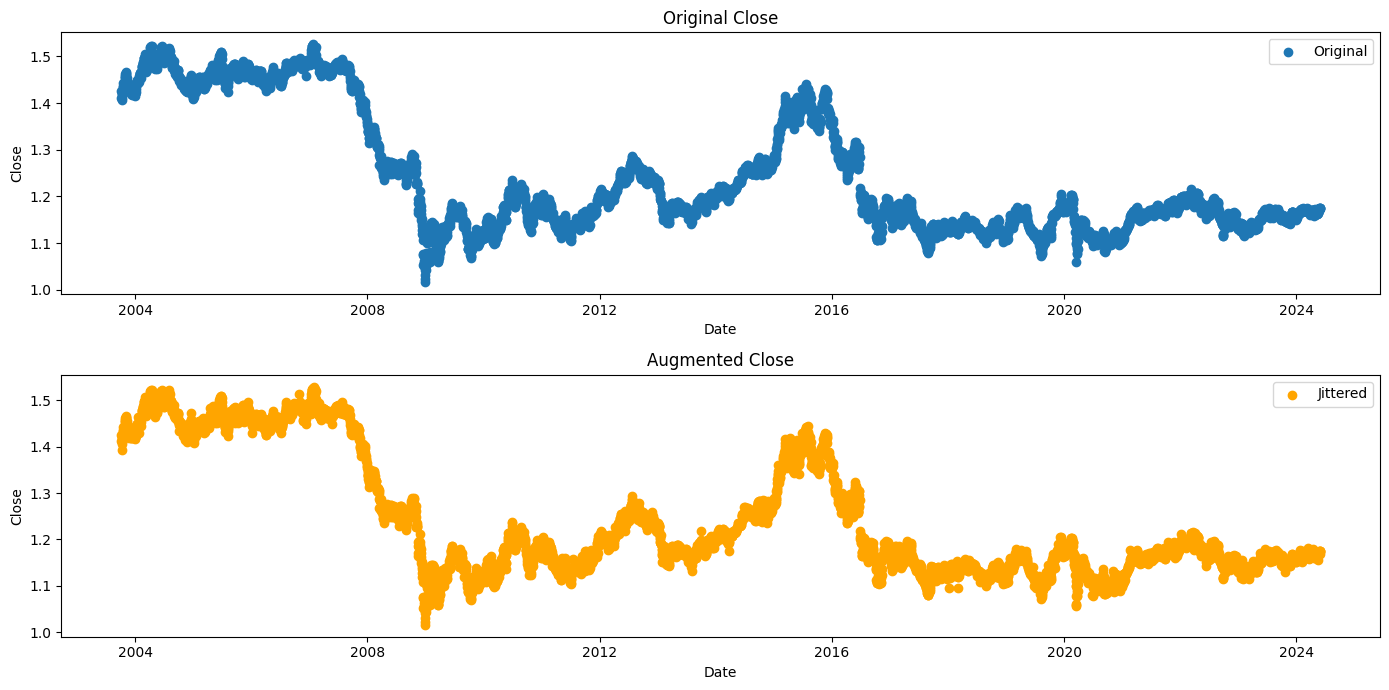

In [36]:
# Scattered plots showing the original and augmented dataset using the close column.

def plot_comparison(data_f_original, data_f_augmented, column_name):
    """
    Function to visually compare the distribution of the original  and jittered data

    Parameters:
    data_f_original: The original dataset containing a 'Date' column and the specified column of interest.
    data_f_jittered: The jittered or modified dataset, with the same structure as data_f_original, including a 'Date' column and the specified column of interest.
    column_name (str): The column name to be compared between the original and jittered datasets(Close)

    Returns:
    None: Generates and displays a visual comparison of the close column between the original and jittered datasets using scattered plot.
    """


    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.scatter(data_f_original['Date'], data_f_original[column_name], label='Original')
    plt.title(f'Original {column_name}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.scatter(data_f_augmented['Date'], data_f_augmented[column_name], label='Jittered', c='orange')
    plt.title(f'Augmented {column_name}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_comparison(cleaned_forex_data_f, augmented_data_f, 'Close')


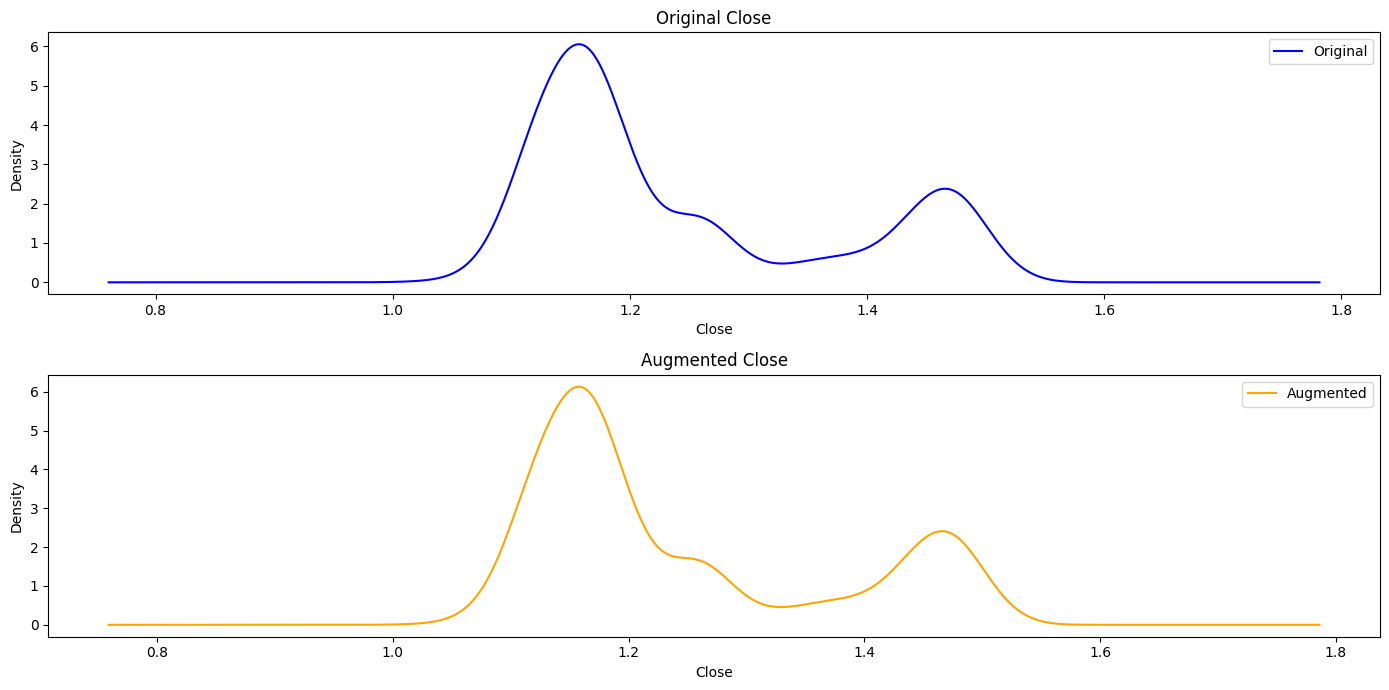

In [37]:
# Density Plot showing the distribution of the original and augmented datasets.

def plot_density(data_f_original, data_f_augmented, column_name):
    """
    Function to plot the density comparison of a specified column between the original
    and jittered datasets. This helps in visualizing the distribution of the data.

    Parameters:
    data_f_original : The original dataset with the designated column of interest in a pandas dataframe.
    data_f_jittered : The augmented dataset with the same column of interest in a pandas dataframe.taframe.
    column_name (str): The name of the column to be compared between the original and jittered datasets.

    Returns:
    None: Generates and displays density plots for the specified column from both datasets.
    """

    plt.figure(figsize=(14, 7))

    # Density plot for original data
    plt.subplot(2, 1, 1)
    data_f_original[column_name].plot(kind='density', label='Original', c='blue')
    plt.title(f'Original {column_name}')
    plt.xlabel(column_name)
    plt.legend()

    # Density plot for jittered data
    plt.subplot(2, 1, 2)
    data_f_augmented[column_name].plot(kind='density', label='Augmented', c='orange')
    plt.title(f'Augmented {column_name}')
    plt.xlabel(column_name)
    plt.legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot density comparison for the 'Close' column
plot_density(cleaned_forex_data_f, augmented_data_f, 'Close')


# **Model Development**

The close price is selected as the target variable because it shows the final trading price of the asset when the day come to close. This price is seen as themost accurate measure of the asset's value for that day since it reflects all the market activity and sentiments right up until the market closes.



In [38]:
# Set random seeds for consistency and  reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Features Selection**

In [39]:
# Making a copy of the original cleaned_stock_data for version control.
augmented_data_f_copy = augmented_data_f.copy()

# Setting Features and target of models

# Features includes all columns except 'Close' and 'Date'
augmtd_X_data_f = augmented_data_f_copy.drop(columns=['Close', 'Date']).values

# The 'Close' price is the target column
augmtd_Y_data_f = augmented_data_f_copy[['Close']].values
augmtd_dates = augmented_data_f_copy['Date'].values

**Augmented data Splitting into Train, Validation and Test sets**

In [40]:
# Splitting the dataset to Train and temp sets
augmtd_X_train, augmtd_X_temp, augmtd_Y_train, augmtd_Y_temp, augmtd_train_dates, augmtd_temp_dates = train_test_split(augmtd_X_data_f, augmtd_Y_data_f, augmtd_dates, test_size=0.3, shuffle=False)

# Sub-dividing the temp set to Validation and Test set
augmtd_X_val, augmtd_X_test, augmtd_Y_val, augmtd_Y_test, augmtd_val_dates,augmtd_test_dates = train_test_split(augmtd_X_temp, augmtd_Y_temp, augmtd_temp_dates, test_size=0.5, shuffle=False)


print(f"The shape of Train set is: {augmtd_X_train.shape}, {augmtd_Y_train.shape}")
print(f"The shape of Validation set is: {augmtd_X_val.shape}, {augmtd_Y_val.shape}")
print(f"The shape of Test set is: {augmtd_X_test.shape}, {augmtd_Y_test.shape}")


The shape of Train set is: (4452, 12), (4452, 1)
The shape of Validation set is: (954, 12), (954, 1)
The shape of Test set is: (954, 12), (954, 1)


**Normalization, Feature scaling and creation of Sequence for Augmented data.**

In [44]:
# Normalize the features and target dataset separately
augmtd_scaler_of_x = StandardScaler()
augmtd_scaler_of_y = StandardScaler()

augmtd_scaled_X_train = augmtd_scaler_of_x.fit_transform(augmtd_X_train)
augmtd_scaled_X_val = augmtd_scaler_of_x.transform(augmtd_X_val)
augmtd_scaled_X_test = augmtd_scaler_of_x.transform(augmtd_X_test)

augmtd_scaled_y_train = augmtd_scaler_of_y.fit_transform(augmtd_Y_train)
augmtd_scaled_y_val = augmtd_scaler_of_y.transform(augmtd_Y_val)
augmtd_scaled_y_test = augmtd_scaler_of_y.fit_transform(augmtd_Y_test)


# create sequences function
def create_sequence_set(data_X, data_Y, dates, seqc_length):
    """A function that makes sequences from the dataset for predicting future data points in a time series.

    Parameters:
    data_X (pandas.DataFrame): The dataset containing the feature columns.
    data_y (pandas.DataFrame): The dataset containing the target column.
    sequence_length (int): The length of the sequences.

    Returns:
    tuple: A tuple that contains two numpy arrays:
        - sequences (numpy.ndarray): The array of sequences created from the feature dataset.
        - labels (numpy.ndarray): The labels array equivalent to the sequences.
    """

    X_s=[]
    y_s=[]
    date_s = []

    for a in range(len(data_X) - seqc_length + 1):
        X_s.append(data_X[a:a+seqc_length])
        y_s.append(data_Y[a+seqc_length] if a+seqc_length < len(data_Y) else data_Y[-1])
        date_s.append(dates[a+seqc_length] if a+seqc_length  < len(dates) else dates[-1])
    return np.array(X_s), np.array(y_s), np.array(date_s)

# Define the sequence length
seqc_length = 15

# Create sequences for each set
augmtd_X_train_seqc, augmtd_y_train_seqc, augmtd_train_dates_seqc = create_sequence_set(augmtd_scaled_X_train, augmtd_scaled_y_train, augmtd_train_dates, seqc_length)
augmtd_X_val_seqc, augmtd_y_val_seqc, augmtd_val_dates_seqc = create_sequence_set(augmtd_scaled_X_val, augmtd_scaled_y_val, augmtd_val_dates, seqc_length)
augmtd_X_test_seqc, augmtd_y_test_seqc, augmtd_test_dates_seqc = create_sequence_set(augmtd_scaled_X_test, augmtd_scaled_y_test, augmtd_test_dates, seqc_length)

# Reshape for X series (GRU Model)
augmtd_X_train_gru = augmtd_X_train_seqc
augmtd_X_val_gru = augmtd_X_val_seqc
augmtd_X_test_gru = augmtd_X_test_seqc

# Reshape for Y sequence( GRU Model)
augmtd_Y_train_gru = augmtd_y_train_seqc
augmtd_Y_val_gru = augmtd_y_val_seqc
augmtd_Y_test_gru = augmtd_y_test_seqc

#Print GRU set shapes
print(f"The shape of augmented GRU's Train set is: {augmtd_X_train_gru.shape}, {augmtd_Y_train_gru.shape}")
print(f"The shape of augmented GRU's Val set is: {augmtd_X_val_gru.shape}, {augmtd_Y_val_gru.shape}")
print(f"The shape of augmented GRU's Test set is: {augmtd_X_test_gru.shape}, {augmtd_Y_test_gru.shape}")
print()

print(f"The shape of augmented GRU's Train date set is: {augmtd_train_dates_seqc.shape}")
print(f"The shape of augmented GRU's Val date set is: {augmtd_val_dates_seqc.shape}")
print(f"The shape of augmented GRU's Test date set is: {augmtd_test_dates_seqc.shape}")
print()


The shape of augmented GRU's Train set is: (4438, 15, 12), (4438, 1)
The shape of augmented GRU's Val set is: (940, 15, 12), (940, 1)
The shape of augmented GRU's Test set is: (940, 15, 12), (940, 1)

The shape of augmented GRU's Train date set is: (4438,)
The shape of augmented GRU's Val date set is: (940,)
The shape of augmented GRU's Test date set is: (940,)



# **GRU Modelling**

**GRU Model building and Training for the augmented dataset.**

In [43]:
# Building the GRU model

model_gru_augmtd= Sequential()
model_gru_augmtd.add(GRU(units=50, return_sequences=True, input_shape=(augmtd_X_train_gru.shape[1], augmtd_X_train_gru.shape[2])))
model_gru_augmtd.add(Dropout(0.2))
model_gru_augmtd.add(GRU(units=50, return_sequences=False))
model_gru_augmtd.add(Dropout(0.2))
model_gru_augmtd.add(Dense(1))

gru_optimizer = Adam(learning_rate=0.001)
model_gru_augmtd.compile(optimizer= gru_optimizer, loss='mean_squared_error')
model_gru_augmtd.summary()

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#  model Training
augmtd_gru_model_history = model_gru_augmtd.fit(augmtd_X_train_gru, augmtd_Y_train_gru,batch_size=32, epochs=100, validation_data=(augmtd_X_val_gru, augmtd_Y_val_gru), callbacks=[early_stopping])

# Saving GRU model
model_gru_augmtd.save('Augmented_gru_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 0.1073 - val_loss: 0.0538
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0240 - val_loss: 0.0521
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0172 - val_loss: 0.0522
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0142 - val_loss: 0.0521
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0131 - val_loss: 0.0520
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0138 - val_loss: 0.0517
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0118 - val_loss: 0.0520
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0117 - val_loss: 0.0516
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0109 - val_loss: 0.0515
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0109 - val_loss: 0.0514
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0111 - val_loss: 0.0522
Epoch 12/100
139/139 ━━━━━━━━

**Predicting and Evaluating GRU model on the Augmented dataset.**

In [45]:
# Make Predictions
augmtd_y_pred = model_gru_augmtd.predict(augmtd_X_test_gru)

# Inverse transform predictions for evaluation
augmtd_y_test = augmtd_Y_test_gru.reshape(-1, 1)
augmtd_y_pred = augmtd_y_pred.reshape(-1, 1)

# Adding back the columns removed before normalization
inverse_transform_data_test = np.hstack((np.zeros((augmtd_Y_test_gru.shape[0], augmtd_scaled_X_test.shape[1]-1)), augmtd_y_test))
inverse_transform_data_pred = np.hstack((np.zeros((augmtd_y_pred.shape[0], augmtd_scaled_X_test.shape[1]-1)), augmtd_y_pred))

# Inverse transform to get actual values
augmtd_y_test_actual = augmtd_scaler_of_y.inverse_transform(inverse_transform_data_test)[:, -1]
augmtd_y_pred= augmtd_scaler_of_y.inverse_transform(inverse_transform_data_pred)[:, -1]

# Using R² to evaluate prediction
r2_train_data = r2_score(augmtd_Y_train_gru, model_gru_augmtd.predict(augmtd_X_train_gru).reshape(-1, 1))
r2_gru_augmtd = r2_score(augmtd_y_test_actual, augmtd_y_pred)

print(f'R² Score for Training_data_set: {r2_train_data:.2f}')
print(f'R² Score for Prediction : {r2_gru_augmtd:.2f}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
R² Score for Training_data_set: 1.00
R² Score for Prediction : -0.15


**Hyper-Parameter Tunning on the GRU model on Augemented Dataset.**

In [ ]:

def build_and_train_gru_model(X_train, Y_train, X_val, Y_val, input_shape, units, dropout_rate, learning_rate, epochs, batch_size):
    """
    Build and train a GRU model.

    Parameters:
    X_train_gru: An array of training data for feature inputs.
    Y_train_seq : An array of training data for target variable.
    X_val_gru: An array of Validation data for feature inputs.
    Y_val_seq : An array of Validation data for target variable.
    input_shape (tuple): Shape of the input data.
    units (int): Number of GRU units.
    dropout_rate (float): Dropout rate
    learning_rate (float): Learning rate
    epochs (int): Total training epochs for the model
    batch_size (int): Batch size for training.

    Returns:
    model (Sequential): Best trained GRU model.
    history (History): Best training history of the model.
    """

    model_gru_augmtd_param = Sequential()
    model_gru_augmtd_param.add(GRU(units=units, input_shape=input_shape, return_sequences=False))
    model_gru_augmtd_param.add(Dropout(dropout_rate))
    model_gru_augmtd_param.add(Dense(1))

    model_gru_augmtd_optimizer = Adam(learning_rate=learning_rate)
    model_gru_augmtd_param.compile(optimizer=  model_gru_augmtd_optimizer, loss='mse')

    model_gru_augmtd_history = model_gru_augmtd_param.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

    return  model_gru_augmtd_param,  model_gru_augmtd_history


#Setting Hyperparameter grid
parameter_grid = {
    'units': [50, 64],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

#Input shape
gru_input_shape=(augmtd_X_train_gru.shape[1], augmtd_X_train_gru.shape[2])

# Initialize best score
best_gru_score = float('-inf')
best_gru_parameters = None
best_gru_model = None

# Iterate over the hyperparameter grid
for units in parameter_grid['units']:
    for dropout_rate in parameter_grid['dropout_rate']:
        for learning_rate in parameter_grid['learning_rate']:
            for batch_size in parameter_grid['batch_size']:
                for epochs in parameter_grid['epochs']:
                    print(f"Training with units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}, batch_size={batch_size}, epochs={epochs}")

                    model, history = build_and_train_gru_model(
                        augmtd_X_train_gru, augmtd_Y_train_gru, augmtd_X_val_gru, augmtd_Y_val_gru,
                        gru_input_shape, units, dropout_rate, learning_rate, epochs, batch_size
                    )
                    #make prediction
                    y_pred = model.predict(augmtd_X_test_gru)

                    # Inverse transform predictions for evaluation
                    y_test = augmtd_Y_test_gru.reshape(-1, 1)
                    y_pred = augmtd_y_pred.reshape(-1, 1)

                    inverse_transform_data_test = np.hstack((np.zeros((augmtd_y_test_seqc.shape[0], augmtd_scaled_X_test.shape[1]-1)), y_test))
                    inverse_transform_data_pred = np.hstack((np.zeros((y_pred.shape[0], augmtd_scaled_X_test.shape[1]-1)), y_pred))

                    best_y_test_actual = augmtd_scaler_of_y.inverse_transform(inverse_transform_data_test)[:, -1]
                    best_y_pred = augmtd_scaler_of_y.inverse_transform(inverse_transform_data_pred)[:, -1]

                    # Evaluate model
                    r2 = r2_score(best_y_test_actual, best_y_pred)
                    print(f"R² Score for current model: {r2:.2f}")

                    if r2 > best_score:
                        best_score = r2
                        best_params = {
                            'units': units,
                            'dropout_rate': dropout_rate,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }
                        best_model = model

print(f"Best parameters: {best_gru_parameters}")
print(f"Best R² Score: {best_gru_score:.2f}")

# Save the best model
best_model.save('best_augmented_gru_model.h5')


Training with units=50, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=50
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3506 - val_loss: 0.0592
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0402 - val_loss: 0.0580
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0252 - val_loss: 0.0583
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0189 - val_loss: 0.0579
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0148 - val_loss: 0.0582
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0128 - val_loss: 0.0582
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0117 - val_loss: 0.0584
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0104 - val_loss: 0.0583
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0100 - val_loss: 0.0579
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0095 - val_loss: 0.0586
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0088 - val_loss: 0.0584
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1177 - val_loss: 0.0612
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0272 - val_loss: 0.0611
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0169 - val_loss: 0.0612
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0135 - val_loss: 0.0631
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0120 - val_loss: 0.0618
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0106 - val_loss: 0.0615
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0106 - val_loss: 0.0613
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0101 - val_loss: 0.0616
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087 - val_loss: 0.0619
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097 - val_loss: 0.0615
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0089 - val_loss: 0.0619
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1737 - val_loss: 0.0622
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0459 - val_loss: 0.0619
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0316 - val_loss: 0.0610
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0234 - val_loss: 0.0606
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0183 - val_loss: 0.0602
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0154 - val_loss: 0.0610
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0145 - val_loss: 0.0609
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0121 - val_loss: 0.0612
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0118 - val_loss: 0.0620
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0118 - val_loss: 0.0610
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0105 - val_loss: 0.0613
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0106 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1743 - val_loss: 0.0563
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0561 - val_loss: 0.0549
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0366 - val_loss: 0.0551
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0292 - val_loss: 0.0556
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0211 - val_loss: 0.0557
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0186 - val_loss: 0.0548
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0149 - val_loss: 0.0555
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0134 - val_loss: 0.0557
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0132 - val_loss: 0.0559
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0121 - val_loss: 0.0558
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0112 - val_loss: 0.0562
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1134 - val_loss: 0.0734
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0129 - val_loss: 0.0731
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0118 - val_loss: 0.0728
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0098 - val_loss: 0.0750
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0097 - val_loss: 0.0747
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0089 - val_loss: 0.0762
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0131 - val_loss: 0.0772
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0093 - val_loss: 0.0733
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097 - val_loss: 0.0750
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - val_loss: 0.0785
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0104 - val_loss: 0.0780
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1504 - val_loss: 0.0663
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0121 - val_loss: 0.0686
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0116 - val_loss: 0.0670
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0114 - val_loss: 0.0688
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0102 - val_loss: 0.0685
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0100 - val_loss: 0.0726
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0103 - val_loss: 0.0716
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0089 - val_loss: 0.0723
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0097 - val_loss: 0.0746
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0106 - val_loss: 0.0771
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0141 - val_loss: 0.0752
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1630 - val_loss: 0.0669
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - val_loss: 0.0653
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0111 - val_loss: 0.0652
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0096 - val_loss: 0.0654
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0097 - val_loss: 0.0669
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0087 - val_loss: 0.0665
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0089 - val_loss: 0.0678
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0085 - val_loss: 0.0700
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0098 - val_loss: 0.0692
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0090 - val_loss: 0.0675
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0085 - val_loss: 0.0692
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0080 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2805 - val_loss: 0.0656
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0191 - val_loss: 0.0651
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0126 - val_loss: 0.0643
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0103 - val_loss: 0.0655
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0094 - val_loss: 0.0659
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0104 - val_loss: 0.0663
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0094 - val_loss: 0.0663
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0087 - val_loss: 0.0657
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - val_loss: 0.0662
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - val_loss: 0.0654
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0082 - val_loss: 0.0661
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2573 - val_loss: 0.0607
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0532 - val_loss: 0.0607
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0307 - val_loss: 0.0596
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0219 - val_loss: 0.0584
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0197 - val_loss: 0.0590
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0169 - val_loss: 0.0589
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0162 - val_loss: 0.0592
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0147 - val_loss: 0.0592
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0147 - val_loss: 0.0593
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0147 - val_loss: 0.0591
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0132 - val_loss: 0.0595
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.5143 - val_loss: 0.0594
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0627 - val_loss: 0.0563
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0389 - val_loss: 0.0549
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0277 - val_loss: 0.0545
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0216 - val_loss: 0.0543
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0193 - val_loss: 0.0549
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0171 - val_loss: 0.0543
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0157 - val_loss: 0.0540
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0148 - val_loss: 0.0547
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0155 - val_loss: 0.0537
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0148 - val_loss: 0.0540
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5607 - val_loss: 0.0651
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0901 - val_loss: 0.0579
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0599 - val_loss: 0.0566
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0423 - val_loss: 0.0572
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0325 - val_loss: 0.0572
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0270 - val_loss: 0.0567
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0223 - val_loss: 0.0566
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0196 - val_loss: 0.0572
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0175 - val_loss: 0.0566
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0160 - val_loss: 0.0569
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0157 - val_loss: 0.0576
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0154 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.5456 - val_loss: 0.0617
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0660 - val_loss: 0.0621
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0439 - val_loss: 0.0606
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0351 - val_loss: 0.0606
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0281 - val_loss: 0.0614
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0219 - val_loss: 0.0607
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0214 - val_loss: 0.0615
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0178 - val_loss: 0.0602
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0178 - val_loss: 0.0607
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - val_loss: 0.0606
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - val_loss: 0.0601
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1391 - val_loss: 0.0671
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0178 - val_loss: 0.0668
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - val_loss: 0.0672
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0138 - val_loss: 0.0679
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0138 - val_loss: 0.0698
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0150 - val_loss: 0.0748
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0152 - val_loss: 0.0736
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0154 - val_loss: 0.0725
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0164 - val_loss: 0.0810
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0156 - val_loss: 0.0850
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0159 - val_loss: 0.0755
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0776 - val_loss: 0.0678
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0159 - val_loss: 0.0672
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0144 - val_loss: 0.0713
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0151 - val_loss: 0.0688
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0143 - val_loss: 0.0710
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0157 - val_loss: 0.0748
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - val_loss: 0.0711
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0172 - val_loss: 0.0785
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0189 - val_loss: 0.0761
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0156 - val_loss: 0.0731
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0155 - val_loss: 0.0765
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0988 - val_loss: 0.0730
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0194 - val_loss: 0.0693
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0170 - val_loss: 0.0704
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0154 - val_loss: 0.0699
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0144 - val_loss: 0.0723
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0133 - val_loss: 0.0744
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0150 - val_loss: 0.0727
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0126 - val_loss: 0.0760
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0140 - val_loss: 0.0718
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0122 - val_loss: 0.0751
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0135 - val_loss: 0.0724
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2168 - val_loss: 0.0687
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0221 - val_loss: 0.0670
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0160 - val_loss: 0.0668
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0161 - val_loss: 0.0677
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0150 - val_loss: 0.0668
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0135 - val_loss: 0.0669
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - val_loss: 0.0654
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0132 - val_loss: 0.0674
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0124 - val_loss: 0.0681
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0136 - val_loss: 0.0695
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0137 - val_loss: 0.0748
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2776 - val_loss: 0.0601
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0372 - val_loss: 0.0575
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0225 - val_loss: 0.0571
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0152 - val_loss: 0.0574
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0118 - val_loss: 0.0573
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0109 - val_loss: 0.0570
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0098 - val_loss: 0.0583
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0096 - val_loss: 0.0578
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0087 - val_loss: 0.0589
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0084 - val_loss: 0.0578
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0082 - val_loss: 0.0580
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5347 - val_loss: 0.0538
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0349 - val_loss: 0.0525
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0248 - val_loss: 0.0520
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0169 - val_loss: 0.0521
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0144 - val_loss: 0.0530
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0125 - val_loss: 0.0529
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0111 - val_loss: 0.0529
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0092 - val_loss: 0.0532
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0091 - val_loss: 0.0531
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0086 - val_loss: 0.0537
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0084 - val_loss: 0.0542
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4380 - val_loss: 0.0614
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0482 - val_loss: 0.0582
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0351 - val_loss: 0.0572
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0258 - val_loss: 0.0575
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - val_loss: 0.0568
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165 - val_loss: 0.0566
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - val_loss: 0.0562
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0132 - val_loss: 0.0567
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0120 - val_loss: 0.0564
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - val_loss: 0.0564
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - val_loss: 0.0559
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.5811 - val_loss: 0.0574
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0473 - val_loss: 0.0544
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0376 - val_loss: 0.0539
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0284 - val_loss: 0.0536
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0234 - val_loss: 0.0535
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0200 - val_loss: 0.0528
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - val_loss: 0.0527
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - val_loss: 0.0533
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - val_loss: 0.0530
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0110 - val_loss: 0.0531
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0107 - val_loss: 0.0533
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1476 - val_loss: 0.0698
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0133 - val_loss: 0.0689
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0091 - val_loss: 0.0700
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0094 - val_loss: 0.0689
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0090 - val_loss: 0.0710
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0088 - val_loss: 0.0747
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0109 - val_loss: 0.0759
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0111 - val_loss: 0.0763
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0094 - val_loss: 0.0777
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0088 - val_loss: 0.0778
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0099 - val_loss: 0.0743
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1105 - val_loss: 0.0705
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0137 - val_loss: 0.0693
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0106 - val_loss: 0.0701
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0102 - val_loss: 0.0713
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0100 - val_loss: 0.0712
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0089 - val_loss: 0.0758
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0093 - val_loss: 0.0785
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0081 - val_loss: 0.0772
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0089 - val_loss: 0.0772
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0094 - val_loss: 0.0801
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0085 - val_loss: 0.0828
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.2005 - val_loss: 0.0713
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - val_loss: 0.0696
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0110 - val_loss: 0.0689
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - val_loss: 0.0685
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - val_loss: 0.0687
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0093 - val_loss: 0.0698
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0079 - val_loss: 0.0702
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - val_loss: 0.0712
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0074 - val_loss: 0.0714
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0074 - val_loss: 0.0725
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0084 - val_loss: 0.0728
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0072 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1216 - val_loss: 0.0696
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0126 - val_loss: 0.0694
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - val_loss: 0.0680
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - val_loss: 0.0686
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0081 - val_loss: 0.0694
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0077 - val_loss: 0.0690
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0073 - val_loss: 0.0702
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0076 - val_loss: 0.0701
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0077 - val_loss: 0.0701
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - val_loss: 0.0714
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0073 - val_loss: 0.0725
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1513 - val_loss: 0.0568
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0395 - val_loss: 0.0585
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0239 - val_loss: 0.0599
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0190 - val_loss: 0.0573
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0151 - val_loss: 0.0584
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0127 - val_loss: 0.0578
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0123 - val_loss: 0.0588
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0113 - val_loss: 0.0585
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0111 - val_loss: 0.0595
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0117 - val_loss: 0.0594
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0108 - val_loss: 0.0587
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2114 - val_loss: 0.0559
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0421 - val_loss: 0.0561
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0242 - val_loss: 0.0560
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0197 - val_loss: 0.0565
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0162 - val_loss: 0.0561
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0138 - val_loss: 0.0575
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0131 - val_loss: 0.0567
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0130 - val_loss: 0.0564
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0117 - val_loss: 0.0565
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0112 - val_loss: 0.0570
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0107 - val_loss: 0.0579
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1798 - val_loss: 0.0640
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0430 - val_loss: 0.0620
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0296 - val_loss: 0.0621
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0230 - val_loss: 0.0617
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0184 - val_loss: 0.0603
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0153 - val_loss: 0.0612
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0142 - val_loss: 0.0611
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0147 - val_loss: 0.0607
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0140 - val_loss: 0.0613
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - val_loss: 0.0604
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - val_loss: 0.0610
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1698 - val_loss: 0.0591
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0471 - val_loss: 0.0573
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0318 - val_loss: 0.0587
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0213 - val_loss: 0.0586
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0166 - val_loss: 0.0581
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0150 - val_loss: 0.0601
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - val_loss: 0.0582
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - val_loss: 0.0578
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - val_loss: 0.0579
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - val_loss: 0.0579
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - val_loss: 0.0584
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1384 - val_loss: 0.0663
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0159 - val_loss: 0.0680
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0148 - val_loss: 0.0674
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0132 - val_loss: 0.0681
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - val_loss: 0.0686
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - val_loss: 0.0698
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0131 - val_loss: 0.0721
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0154 - val_loss: 0.0697
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0149 - val_loss: 0.0714
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0131 - val_loss: 0.0710
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0134 - val_loss: 0.0807
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1660 - val_loss: 0.0687
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0162 - val_loss: 0.0653
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0152 - val_loss: 0.0681
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0126 - val_loss: 0.0668
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0133 - val_loss: 0.0670
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0125 - val_loss: 0.0687
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0131 - val_loss: 0.0712
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0158 - val_loss: 0.0742
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0146 - val_loss: 0.0743
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0134 - val_loss: 0.0720
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0151 - val_loss: 0.0750
Epoch 12/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2140 - val_loss: 0.0683
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167 - val_loss: 0.0696
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - val_loss: 0.0682
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - val_loss: 0.0707
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - val_loss: 0.0697
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - val_loss: 0.0697
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - val_loss: 0.0701
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0109 - val_loss: 0.0697
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0119 - val_loss: 0.0718
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - val_loss: 0.0708
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - val_loss: 0.0730
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1986 - val_loss: 0.0676
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - val_loss: 0.0667
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - val_loss: 0.0663
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - val_loss: 0.0669
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - val_loss: 0.0667
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0121 - val_loss: 0.0673
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - val_loss: 0.0669
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - val_loss: 0.0695
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0112 - val_loss: 0.0669
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0098 - val_loss: 0.0689
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0107 - val_loss: 0.0695
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0

R² Score for current model: -1.47
Best parameters: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 50}
Best R² Score: -1.47


The Augmented dataset for the GRU model is dropped because even after hyperparameter tunning, the R² score is still very low.
I will be moving forward with the Original dataset for modelling.

**Data preparation for original data modeling.**

**Original dataset Feature Selection.**

In [46]:
# Making a copy of the original cleaned_stock_data for version control
cleaned_forex_data_f_copy = cleaned_forex_data_f.copy()

# Setting Features and target of models

# Features includes all columns except 'Close' and 'Date'
X_data_f = cleaned_forex_data_f_copy.drop(columns=['Close', 'Date']).values

# The 'Close' price is the target column
Y_data_f = cleaned_forex_data_f_copy[['Close']].values
dates = cleaned_forex_data_f_copy['Date'].values

**Splitting of data into Train, Validation and Test Sets**

In [47]:
# Splitting the dataset to Train and temp sets
dataX_train, dataX_temp, dataY_train, dataY_temp, train_dates, temp_dates = train_test_split(X_data_f, Y_data_f, dates, test_size=0.3, shuffle=False)

# Sub-dividing the temp set to Validation and Test sets
dataX_val, dataX_test, dataY_val, dataY_test, val_dates, test_dates = train_test_split(dataX_temp, dataY_temp, temp_dates, test_size=0.5, shuffle=False)


print(f"The shape of Train set is: {dataX_train.shape}, {dataY_train.shape}")
print(f"The shape of Val set is: {dataX_val.shape}, {dataY_val.shape}")
print(f"The shape of Test set is: {dataX_test.shape}, {dataY_test.shape}")

print()
print(f"The shape of Train dates set is: {train_dates.shape}")
print(f"The shape of Val dates set is: {val_dates.shape}")
print(f"The shape of Test dates set is: {test_dates.shape}")

The shape of Train set is: (3752, 12), (3752, 1)
The shape of Val set is: (804, 12), (804, 1)
The shape of Test set is: (804, 12), (804, 1)

The shape of Train dates set is: (3752,)
The shape of Val dates set is: (804,)
The shape of Test dates set is: (804,)


**Normalization, Feature scaling and creation of Sequence for the Original data**

In [48]:
# Normalize the data using StandardScaler
scaler_Xs = StandardScaler()
scaler_Ys = StandardScaler()

scaled_dataX_train = scaler_Xs.fit_transform(dataX_train)
scaled_dataX_val = scaler_Xs.transform(dataX_val)
scaled_dataX_test = scaler_Xs.transform(dataX_test)

scaled_dataY_train = scaler_Ys.fit_transform(dataY_train)
scaled_dataY_val = scaler_Ys.transform(dataY_val)
scaled_dataY_test = scaler_Ys.transform(dataY_test)

# create sequence sets function
def generate_seq_set(data_X, data_Y, date, seqc_length):
    """
    Function to create sequences from the dataset for time series forecasting.

    Parameters:
    data_X (pandas.DataFrame): The dataset containing the feature columns.
    data_y (pandas.DataFrame): The dataset containing the target column.
    sequence_length (int): The length of the sequences created.

    Returns:
    tuple: A tuple comprising two numpy arrays:
        - sequences (numpy.ndarray): The array of sequences created from the feature dataset.
        - labels (numpy.ndarray): The labels array mapped to each sequences.
    """

    x_s=[]
    y_s=[]
    dates=[]

    for a in range(len(data_X) - seqc_length + 1):
        x_s.append(data_X[a:a+seqc_length])
        y_s.append(data_Y[a+seqc_length] if a+seqc_length < len(data_Y) else data_Y[-1])
        dates.append(date[a+seqc_length] if a+seqc_length  < len(date) else date[-1])
    return np.array(x_s), np.array(y_s), np.array(dates)


# Define the sequence length
seqc_length = 15

# Create sequences for each set
dataX_train_seq, dataY_train_seq, train_dates_seq = generate_seq_set(scaled_dataX_train, scaled_dataY_train, train_dates, seqc_length)
dataX_val_seq, dataY_val_seq, val_dates_seq = generate_seq_set(scaled_dataX_val, scaled_dataY_val,val_dates, seqc_length)
dataX_test_seq, dataY_test_seq, test_dates_seq = generate_seq_set(scaled_dataX_test, scaled_dataY_test,test_dates, seqc_length)

# Reshape for X sequence (GRU Model)
dataX_train_gru = dataX_train_seq
dataX_val_gru = dataX_val_seq
dataX_test_gru = dataX_test_seq

# Reshape for Y sequence(GRU Model)
dataY_train_gru = dataY_train_seq
dataY_val_gru = dataY_val_seq
dataY_test_gru = dataY_test_seq

print(f"The shape of GRU's Train set is: {dataX_train_gru.shape}, {dataY_train_gru.shape}")
print(f"The shape of GRU's Val set is: {dataX_val_gru.shape}, {dataY_val_gru.shape}")
print(f"The shape of GRU's Test set is: {dataX_test_gru.shape}, {dataY_test_gru.shape}")
print()

# Reshape X sequences for  XGBoost and Gaussian Process Regressor.
dataX_train_flat = dataX_train_seq.reshape(dataX_train_seq.shape[0], -1)
dataX_val_flat = dataX_val_seq.reshape(dataX_val_seq.shape[0], -1)
dataX_test_flat = dataX_test_seq.reshape(dataX_test_seq.shape[0], -1)

# Reshape Y sequences for  XGBoost and Gaussian Process Regressor.
dataY_train_flat = dataY_train_seq.flatten()
dataY_val_flat = dataY_val_seq.flatten()
dataY_test_flat = dataY_test_seq.flatten()

print()
print(f"The shape of XGBoost/Gaussian Process X_Train set is: {dataX_train_flat.shape}, {dataY_train_seq.shape}")
print(f"The shape of XGBoost/Gaussian Process X_Val set is: {dataX_val_flat.shape}, {dataY_val_seq.shape}")
print(f"The shape of XGBoost/Gaussian Process X_Test set is: {dataX_test_flat.shape}, {dataY_test_seq.shape}")

print()
print(f"The shape of XGBoost/Gaussian Process Y_Train set is: {dataY_train_flat.shape}, {dataY_train_seq.shape}")
print(f"The shape of XGBoost/Gaussian Process Y_Val set is: {dataY_val_flat.shape}, {dataY_val_seq.shape}")
print(f"The shape of XGBoost/Gaussian Process Y_Test set is: {dataY_test_flat.shape}, {dataY_test_seq.shape}")

print()
# checking the start and end dates for each sequence
print(f"Model Training date starts from: {train_dates_seq[0]} to {train_dates_seq[-1]}")
print(f"Model Validation date starts from: {val_dates_seq[0]} to {val_dates_seq[-1]}")
print(f"Model Testing on new data starts from: {test_dates_seq[0]} to {test_dates_seq[-1]}")

The shape of GRU's Train set is: (3738, 15, 12), (3738, 1)
The shape of GRU's Val set is: (790, 15, 12), (790, 1)
The shape of GRU's Test set is: (790, 15, 12), (790, 1)


The shape of XGBoost/Gaussian Process X_Train set is: (3738, 180), (3738, 1)
The shape of XGBoost/Gaussian Process X_Val set is: (790, 180), (790, 1)
The shape of XGBoost/Gaussian Process X_Test set is: (790, 180), (790, 1)

The shape of XGBoost/Gaussian Process Y_Train set is: (3738,), (3738, 1)
The shape of XGBoost/Gaussian Process Y_Val set is: (790,), (790, 1)
The shape of XGBoost/Gaussian Process Y_Test set is: (790,), (790, 1)

Model Training date starts from: 2003-10-27T00:00:00.000000000 to 2018-04-02T00:00:00.000000000
Model Validation date starts from: 2018-04-24T00:00:00.000000000 to 2021-04-30T00:00:00.000000000
Model Testing on new data starts from: 2021-05-24T00:00:00.000000000 to 2024-05-30T00:00:00.000000000


**Saving Scalers X and Y**

In [49]:
#save scaler X
dump(scaler_Xs, 'scaler_X.bin')

#save scaler Y
dump(scaler_Ys, 'scaler_Y.bin')

['scaler_Y.bin']

**Building and Training of GRU model**

In [50]:
def build_and_train_model_gru(dataX_train_gru, dataY_train_gru, dataX_val_gru, dataY_val_gru, input_shape, units, dropout_rate, learning_rate, epochs, batch_size, callbacks= None):
    """
    Build and train a GRU model.

    Parameters:
    dataX_train_gru: An array of training data for feature inputs.
    dataY_train_seq : An array of training data for target variable.
    dataX_val_gru: An array of Validation data for feature inputs.
    dataY_val_seq : An array of Validation data for target variable.
    input_shape (tuple): Shape of the input data.
    units (int): Number of GRU units.
    dropout_rate (float): Dropout rate
    learning_rate (float): Learning rate
    epochs (int): Total training epochs for the model
    batch_size (int): Batch size for training.

    Returns:
    model (Sequential): Trained GRU model.
    history (History): Training history of the model.
    """

    ri_gru_model = Sequential()
    ri_gru_model.add(GRU(units=units, return_sequences=True, input_shape=input_shape))
    ri_gru_model.add(Dropout(dropout_rate))
    ri_gru_model.add(GRU(units=units, return_sequences=False))
    ri_gru_model.add(Dropout(dropout_rate))
    ri_gru_model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    ri_gru_model.compile(optimizer=optimizer, loss='mean_squared_error')
    ri_gru_model.summary()

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history =  ri_gru_model.fit(dataX_train_gru, dataY_train_gru, epochs=epochs, batch_size=batch_size, validation_data=(dataX_val_gru, dataY_val_seq), callbacks=[early_stopping])

    return  ri_gru_model, history

# Train the GRU model with a specific set of parameters
ri_gru_model, gru_history = build_and_train_model_gru(
    dataX_train_gru, dataY_train_gru, dataX_val_gru, dataY_val_gru,
    input_shape=(dataX_train_gru.shape[1], dataX_train_gru.shape[2]),
    units=50,
    dropout_rate=0.2,
    learning_rate=0.001,
    epochs=50,
    batch_size=32
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.2249 - val_loss: 0.0035
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0270 - val_loss: 0.0034
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0193 - val_loss: 0.0028
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0174 - val_loss: 0.0018
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0155 - val_loss: 0.0031
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0155 - val_loss: 0.0025
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0137 - val_loss: 0.0014
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0123 - val_loss: 0.0016
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0121 - val_loss: 0.0036
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0114 - val_loss: 0.0017
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - val_loss: 0.0027
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

**Prediction and Evaluation of GRU Model using R² score.**

In [53]:
# Make Predictions
test_prediction_gru = ri_gru_model.predict(dataX_test_gru)

# Inverse transform predictions for evaluation
Y_test_actual_gru = dataY_test_gru.reshape(-1, 1)
test_prediction_gru = test_prediction_gru.reshape(-1, 1)

# Adding back the columns removed before normalization
inverse_transform_data_test = np.hstack((np.zeros((dataY_test_gru.shape[0], dataX_test_gru.shape[1]-1)), Y_test_actual_gru))
inverse_transform_data_pred = np.hstack((np.zeros((test_prediction_gru.shape[0], dataX_test_gru.shape[1]-1)), test_prediction_gru))

# Inverse transform to get actual values
test_actual_values = scaler_Ys.inverse_transform(inverse_transform_data_test)[:, -1]
predicted_test_values = scaler_Ys.inverse_transform(inverse_transform_data_pred)[:, -1]

# Using R² to evaluate prediction
r2_train_data = r2_score(dataY_train_gru, ri_gru_model.predict(dataX_train_gru).reshape(-1, 1))
r2_test_data = r2_score(test_actual_values, predicted_test_values)

print(f'R² Score for Training_data_set: {r2_train_data:.2f}')
print(f'R² Score for Prediction : {r2_test_data:.2f}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
R² Score for Training_data_set: 1.00
R² Score for Prediction : 0.97


**Load in already saved models.**

In [ ]:
def load_in_models():
    """
    Load the saved models from disk.

    Returns:
    tuple: A tuple that contains the loaded GRU, XGBoost, and Gaussian Process Regressor models.
    """

    # Load in the GRU model
    model_gru = load_model('best_gru_model.keras')

    # Load in the XGBoost model
    model_xgb = xgb.Booster()
    model_xgb.load_model('xgb_model.json')

    # Load in the Gaussian Process Regressor model
    model_gpr = joblib.load('gpr_model.pkl')

    return model_gru, model_xgb, model_gpr

model_gru, model_xgb, model_gpr = load_in_models()

**Hyper-Parameter Tunning of GRU Model.**

In [ ]:
# Hyperparameter grid
parameter_grid = {
    'units': [50, 64],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Data shapes
input_shape = (dataX_train_gru.shape[1], dataX_train_gru.shape[2])

# Iterate over the hyperparameter grid
my_best_mae_score = float('inf')
best_parameters_gru = None
best_model_gru = None
best_history_gru = None

for units in parameter_grid['units']:
    for dropout_rate in parameter_grid['dropout_rate']:
        for learning_rate in parameter_grid['learning_rate']:
            for batch_size in parameter_grid['batch_size']:
                for epochs in parameter_grid['epochs']:
                    print(f"Training with units={units}, learning_rate={learning_rate}, dropout_rate={dropout_rate}, epochs={epochs}, batch_size={batch_size}")

                    # Early stopping callback
                    early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=10)

                    # Build and train the GRU model
                    model, history = build_and_train_model_gru(
                        dataX_train_gru, dataY_train_gru,
                        dataX_val_gru, dataY_val_gru,
                        input_shape, units,
                        dropout_rate, learning_rate,
                        epochs, batch_size,
                        callbacks=[early_stopping]  # Add the early stopping callback

                    )

                    # validation set prediction
                    Y_predctd_for_val = model.predict(dataX_val_gru)
                    Y_val_inverse = scaler_Ys.inverse_transform(dataY_val_gru)
                    Y_predctd_inverse = scaler_Ys.inverse_transform(Y_predctd_for_val)

                    # Calculate validation MAE
                    validation_mae = mean_absolute_error(Y_val_inverse, Y_predctd_inverse)
                    print(f"Validation MAE: {validation_mae}")

                    if validation_mae < my_best_mae_score:
                        my_best_mae_score = validation_mae
                        best_parameters_gru = {
                            'units': units,
                            'dropout_rate': dropout_rate,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }
                        best_model_gru = model
                        best_history_gru = history

print(f"Best parameters: {best_parameters_gru}")
print(f"Best validation MAE: {my_best_mae_score}")

# Save the best model
best_model_gru.save('best_gru_model.keras')


Training with units=50, dropout_rate=0.2, learning_rate=0.001, batch_size=32, epochs=50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_103 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_103 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_104 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1818 - val_loss: 0.0043
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0261 - val_loss: 0.0037
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0221 - val_loss: 0.0028
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0175 - val_loss: 0.0022
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0171 - val_loss: 0.0023
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0139 - val_loss: 0.0020
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0129 - val_loss: 0.0028
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0131 - val_loss: 0.0018
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0127 - val_loss: 0.0061
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0113 - val_loss: 0.0025
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0116 - val_loss: 0.0020
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_105 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_106 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.2010 - val_loss: 0.0032
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0274 - val_loss: 0.0037
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0202 - val_loss: 0.0048
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0171 - val_loss: 0.0018
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0152 - val_loss: 0.0019
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0137 - val_loss: 0.0040
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0142 - val_loss: 0.0022
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0135 - val_loss: 0.0044
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0136 - val_loss: 0.0019
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0119 - val_loss: 0.0014
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0134 - val_loss: 0.0022
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_107 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_108 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_108 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3469 - val_loss: 0.0091
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0371 - val_loss: 0.0046
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0272 - val_loss: 0.0052
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0225 - val_loss: 0.0037
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0217 - val_loss: 0.0021
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0195 - val_loss: 0.0020
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0172 - val_loss: 0.0034
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0173 - val_loss: 0.0027
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0154 - val_loss: 0.0033
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - val_loss: 0.0026
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - val_loss: 0.0019
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_109 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_109 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_110 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_110 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.2154 - val_loss: 0.0054
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0315 - val_loss: 0.0033
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0234 - val_loss: 0.0085
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0206 - val_loss: 0.0028
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0182 - val_loss: 0.0051
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0168 - val_loss: 0.0033
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0156 - val_loss: 0.0039
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0141 - val_loss: 0.0026
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0137 - val_loss: 0.0034
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0123 - val_loss: 0.0032
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0128 - val_loss: 0.0051
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_111 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_111 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_112 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_112 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.1580 - val_loss: 0.0057
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0166 - val_loss: 0.0250
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0167 - val_loss: 0.0105
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0141 - val_loss: 0.0064
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - val_loss: 0.0037
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0134 - val_loss: 0.0023
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0118 - val_loss: 0.0100
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0126 - val_loss: 0.0129
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0130 - val_loss: 0.0043
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0149 - val_loss: 0.0075
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_113 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_113 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_114 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_114 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.1289 - val_loss: 0.0185
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0194 - val_loss: 0.0094
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0165 - val_loss: 0.0163
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0126 - val_loss: 0.0141
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - val_loss: 0.0127
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0125 - val_loss: 0.0037
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0131 - val_loss: 0.0161
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0126 - val_loss: 0.0012
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0119 - val_loss: 0.0090
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0124 - val_loss: 0.0302
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0132 - val_loss: 0.0048
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_115 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_115 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_116 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_116 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1603 - val_loss: 0.0066
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0215 - val_loss: 0.0027
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0153 - val_loss: 0.0088
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0154 - val_loss: 0.0041
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0119 - val_loss: 0.0030
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0126 - val_loss: 0.0058
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - val_loss: 0.0082
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0117 - val_loss: 0.0037
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0119 - val_loss: 0.0036
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0119 - val_loss: 0.0028
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0118 - val_loss: 0.0013
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_117 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_118 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_118 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2512 - val_loss: 0.0100
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0186 - val_loss: 0.0025
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - val_loss: 0.0090
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0149 - val_loss: 0.0069
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0120 - val_loss: 0.0022
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - val_loss: 0.0021
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - val_loss: 0.0014
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0118 - val_loss: 0.0045
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0112 - val_loss: 0.0029
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - val_loss: 0.0019
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0096 - val_loss: 0.0021
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_119 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_119 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_120 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_120 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.2154 - val_loss: 0.0042
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0395 - val_loss: 0.0027
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0265 - val_loss: 0.0040
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0253 - val_loss: 0.0027
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0208 - val_loss: 0.0022
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - val_loss: 0.0074
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0198 - val_loss: 0.0024
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0184 - val_loss: 0.0038
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0170 - val_loss: 0.0100
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0183 - val_loss: 0.0055
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0164 - val_loss: 0.0019
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_121 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_121 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_122 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2224 - val_loss: 0.0076
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0432 - val_loss: 0.0027
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0291 - val_loss: 0.0029
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0251 - val_loss: 0.0035
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0223 - val_loss: 0.0039
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0189 - val_loss: 0.0030
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0176 - val_loss: 0.0025
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0185 - val_loss: 0.0057
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0186 - val_loss: 0.0071
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0176 - val_loss: 0.0018
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0167 - val_loss: 0.0019
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_123 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_124 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3237 - val_loss: 0.0121
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0599 - val_loss: 0.0047
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0417 - val_loss: 0.0027
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0318 - val_loss: 0.0035
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0278 - val_loss: 0.0022
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0257 - val_loss: 0.0027
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0236 - val_loss: 0.0031
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0216 - val_loss: 0.0023
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0209 - val_loss: 0.0033
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0214 - val_loss: 0.0024
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0183 - val_loss: 0.0031
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_125 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_126 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.2857 - val_loss: 0.0054
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0476 - val_loss: 0.0042
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0348 - val_loss: 0.0039
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0293 - val_loss: 0.0037
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0256 - val_loss: 0.0042
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0226 - val_loss: 0.0049
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0225 - val_loss: 0.0025
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0206 - val_loss: 0.0018
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0198 - val_loss: 0.0027
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0187 - val_loss: 0.0022
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0183 - val_loss: 0.0016
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_127 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_128 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.1646 - val_loss: 0.0022
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0246 - val_loss: 0.0072
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0219 - val_loss: 0.0032
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0208 - val_loss: 0.0016
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0180 - val_loss: 0.0079
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0186 - val_loss: 0.0099
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0192 - val_loss: 0.0180
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0191 - val_loss: 0.0055
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0222 - val_loss: 0.0078
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0172 - val_loss: 0.0184
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0160 - val_loss: 0.0073
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_129 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_130 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.1998 - val_loss: 0.0044
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0236 - val_loss: 0.0034
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0218 - val_loss: 0.0359
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0188 - val_loss: 0.0063
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0204 - val_loss: 0.0113
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0196 - val_loss: 0.0043
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0184 - val_loss: 0.0107
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0178 - val_loss: 0.0044
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0180 - val_loss: 0.0454
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0203 - val_loss: 0.0156
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0173 - val_loss: 0.0039
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_131 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_131 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_132 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_132 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1799 - val_loss: 0.0040
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0267 - val_loss: 0.0027
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0202 - val_loss: 0.0071
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0185 - val_loss: 0.0024
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - val_loss: 0.0066
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - val_loss: 0.0080
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - val_loss: 0.0017
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0197 - val_loss: 0.0063
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - val_loss: 0.0034
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0142 - val_loss: 0.0027
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0143 - val_loss: 0.0018
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_133 (GRU)                        │ (None, 15, 50)              │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_133 (Dropout)                │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_134 (GRU)                        │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 24,951 (97.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.1543 - val_loss: 0.0106
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0250 - val_loss: 0.0045
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0202 - val_loss: 0.0090
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0208 - val_loss: 0.0078
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0181 - val_loss: 0.0056
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0170 - val_loss: 0.0019
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0161 - val_loss: 0.0020
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - val_loss: 0.0093
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0171 - val_loss: 0.0121
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0161 - val_loss: 0.0030
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0163 - val_loss: 0.0031
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_135 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_135 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_136 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_136 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.1442 - val_loss: 0.0028
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0214 - val_loss: 0.0054
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0175 - val_loss: 0.0024
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0145 - val_loss: 0.0021
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0136 - val_loss: 0.0021
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0123 - val_loss: 0.0019
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0114 - val_loss: 0.0020
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0110 - val_loss: 0.0055
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0110 - val_loss: 0.0015
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0100 - val_loss: 0.0011
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0115 - val_loss: 0.0013
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_137 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_137 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_138 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_138 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.2704 - val_loss: 0.0028
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0260 - val_loss: 0.0027
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0196 - val_loss: 0.0062
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0168 - val_loss: 0.0022
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0139 - val_loss: 0.0015
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0132 - val_loss: 0.0043
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0121 - val_loss: 0.0016
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0120 - val_loss: 0.0017
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0119 - val_loss: 0.0022
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0104 - val_loss: 0.0044
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0108 - val_loss: 0.0012
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_139 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_139 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_140 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_140 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.2600 - val_loss: 0.0054
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0279 - val_loss: 0.0057
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0214 - val_loss: 0.0039
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0168 - val_loss: 0.0026
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0165 - val_loss: 0.0029
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0150 - val_loss: 0.0022
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0128 - val_loss: 0.0040
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0128 - val_loss: 0.0034
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0125 - val_loss: 0.0026
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0113 - val_loss: 0.0032
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0103 - val_loss: 0.0020
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_141 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_141 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_142 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_142 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.2848 - val_loss: 0.0042
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0314 - val_loss: 0.0031
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0238 - val_loss: 0.0023
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0190 - val_loss: 0.0025
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0171 - val_loss: 0.0032
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0158 - val_loss: 0.0025
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0141 - val_loss: 0.0041
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0142 - val_loss: 0.0026
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0132 - val_loss: 0.0028
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0120 - val_loss: 0.0017
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0123 - val_loss: 0.0024
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_143 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_143 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_144 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_144 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.2087 - val_loss: 0.0056
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0153 - val_loss: 0.0032
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0154 - val_loss: 0.0028
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0157 - val_loss: 0.0011
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0114 - val_loss: 0.0213
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0136 - val_loss: 0.0421
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0119 - val_loss: 0.0519
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0142 - val_loss: 0.0080
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0106 - val_loss: 0.0078
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0099 - val_loss: 0.0156
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0117 - val_loss: 0.0077
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_145 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_145 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_146 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_146 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1951 - val_loss: 0.0036
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0158 - val_loss: 0.0063
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0130 - val_loss: 0.0181
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0151 - val_loss: 0.0067
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0124 - val_loss: 0.0051
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0105 - val_loss: 0.0114
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0118 - val_loss: 0.0141
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0116 - val_loss: 0.0328
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0123 - val_loss: 0.0049
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0110 - val_loss: 0.0145
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0110 - val_loss: 0.0030
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_147 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_147 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_148 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_148 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2552 - val_loss: 0.0033
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0211 - val_loss: 0.0112
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0186 - val_loss: 0.0032
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0130 - val_loss: 0.0026
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0119 - val_loss: 0.0021
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0107 - val_loss: 0.0015
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0109 - val_loss: 0.0016
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0101 - val_loss: 0.0017
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0095 - val_loss: 0.0043
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0116 - val_loss: 0.0035
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_149 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_149 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_150 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_150 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.3265 - val_loss: 0.0028
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0205 - val_loss: 0.0048
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0143 - val_loss: 0.0088
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0128 - val_loss: 0.0015
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0110 - val_loss: 0.0119
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0110 - val_loss: 0.0030
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0145 - val_loss: 0.0079
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0112 - val_loss: 0.0011
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0098 - val_loss: 0.0018
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0097 - val_loss: 0.0015
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_151 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_151 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_152 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_152 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2415 - val_loss: 0.0030
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0323 - val_loss: 0.0092
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0260 - val_loss: 0.0039
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0200 - val_loss: 0.0025
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0191 - val_loss: 0.0025
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0185 - val_loss: 0.0022
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0157 - val_loss: 0.0018
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0156 - val_loss: 0.0021
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0144 - val_loss: 0.0036
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0155 - val_loss: 0.0013
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0144 - val_loss: 0.0048
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_153 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_153 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_154 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_154 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.1800 - val_loss: 0.0048
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0343 - val_loss: 0.0023
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0243 - val_loss: 0.0015
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0193 - val_loss: 0.0015
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0186 - val_loss: 0.0020
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0158 - val_loss: 0.0039
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0159 - val_loss: 0.0048
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0145 - val_loss: 0.0026
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0147 - val_loss: 0.0019
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0170 - val_loss: 0.0025
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0132 - val_loss: 0.0037
Epoch 12/100
117/117 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_155 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_155 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_156 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_156 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.2231 - val_loss: 0.0041
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0393 - val_loss: 0.0032
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0301 - val_loss: 0.0026
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0245 - val_loss: 0.0021
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0218 - val_loss: 0.0019
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0200 - val_loss: 0.0018
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0188 - val_loss: 0.0017
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0178 - val_loss: 0.0015
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0170 - val_loss: 0.0025
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0169 - val_loss: 0.0022
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0162 - val_loss: 0.0017
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_157 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_157 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_158 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_158 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.3160 - val_loss: 0.0058
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0470 - val_loss: 0.0041
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0353 - val_loss: 0.0026
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0286 - val_loss: 0.0026
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0239 - val_loss: 0.0019
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0219 - val_loss: 0.0019
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0204 - val_loss: 0.0024
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0181 - val_loss: 0.0023
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0193 - val_loss: 0.0015
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0173 - val_loss: 0.0025
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0172 - val_loss: 0.0022
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_159 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_159 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_160 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_160 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.1885 - val_loss: 0.0022
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0234 - val_loss: 0.0024
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0181 - val_loss: 0.0073
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0166 - val_loss: 0.0027
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - val_loss: 0.0055
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0179 - val_loss: 0.0049
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - val_loss: 0.0022
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0159 - val_loss: 0.0019
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0170 - val_loss: 0.0019
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0148 - val_loss: 0.0199
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0170 - val_loss: 0.0098
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_161 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_161 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_162 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_162 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.2038 - val_loss: 0.0055
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0204 - val_loss: 0.0024
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0187 - val_loss: 0.0123
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - val_loss: 0.0078
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0191 - val_loss: 0.0029
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0176 - val_loss: 0.0294
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0177 - val_loss: 0.0057
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0173 - val_loss: 0.0047
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0186 - val_loss: 0.0386
Epoch 10/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0157 - val_loss: 0.0034
Epoch 11/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0147 - val_loss: 0.0036
Epoch 12/100
117/117 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_163 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_163 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_164 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_164 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.2830 - val_loss: 0.0031
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0246 - val_loss: 0.0156
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0209 - val_loss: 0.0028
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0185 - val_loss: 0.0039
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0176 - val_loss: 0.0124
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0159 - val_loss: 0.0017
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0172 - val_loss: 0.0086
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0147 - val_loss: 0.0012
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0131 - val_loss: 0.0034
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0146 - val_loss: 0.0022
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0139 - val_loss: 0.0039
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_165 (GRU)                        │ (None, 15, 64)              │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_165 (Dropout)                │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_166 (GRU)                        │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_166 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,001 (156.25 KB)

 Trainable params: 40,001 (156.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.3616 - val_loss: 0.0065
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0300 - val_loss: 0.0052
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0207 - val_loss: 0.0027
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0175 - val_loss: 0.0046
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0168 - val_loss: 0.0020
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0163 - val_loss: 0.0016
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0146 - val_loss: 0.0033
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0150 - val_loss: 0.0052
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0151 - val_loss: 0.0016
Epoch 10/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0140 - val_loss: 0.0034
Epoch 11/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0143 - val_loss: 0.0056
Epoch 12/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step

**Predicting and Evaluating the best GRU model using R² score.**

In [62]:
# Make Predictions
best_test_prediction_gru = model_gru.predict(dataX_test_gru)

# Inverse transform predictions for evaluation
best_Y_test_gru_actual = dataY_test_gru.reshape(-1, 1)
best_test_prediction_gru = best_test_prediction_gru.reshape(-1, 1)

# Adding back the columns removed before normalization
inverse_transform_data_test = np.hstack((np.zeros((dataY_test_gru.shape[0], dataX_test_gru.shape[1]-1)), best_Y_test_gru_actual))
inverse_transform_data_pred = np.hstack((np.zeros((best_test_prediction_gru.shape[0], dataX_test_gru.shape[1]-1)), best_test_prediction_gru))

# Inverse transform to get actual values
best_Y_test_gru_actual = scaler_Ys.inverse_transform(inverse_transform_data_test)[:, -1]
best_gru_test_predictions = scaler_Ys.inverse_transform(inverse_transform_data_pred)[:, -1]

# Using R² to evaluate prediction
r2_train_data = r2_score(dataY_train_gru, model_gru.predict(dataX_train_gru).reshape(-1, 1))
r2_test_data = r2_score(best_Y_test_gru_actual, best_gru_test_predictions)

print(f'R² Score for Training_data_set: {r2_train_data:.2f}')
print(f'R² Score for Prediction : {r2_test_data:.2f}')



25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
R² Score for Training_data_set: 1.00
R² Score for Prediction : 0.96


# **Xgboost Modelling**

**Building and Training of Xgboost model.**

In [73]:
def build_and_train_model_xgb(dataX_train_flat, dataY_train_flat, dataX_val_flat, dataY_val_flat):
    """
    Build and train an XGBoost model.

    Parameters:
    X_train_flat : Training data for features, flattened into a single dimension.
    y_train_seq : Target variable training data.
    X_val_flat : Validation data for features, flattened into a single dimension.
    y_val_seq : arget variable Validation data.

    Returns:
    xgb_model (XGBRegressor): Trained XGBoost model.
    """
    ri_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
    ri_xgb_model.fit(dataX_train_flat, dataY_train_flat.ravel(), eval_set=[(dataX_val_flat, dataY_val_flat.ravel())], verbose=False)

    return ri_xgb_model

# Train the xgb model
ri_xgb_model = build_and_train_model_xgb(dataX_train_flat, dataY_train_flat, dataX_val_flat, dataY_val_flat)



**Predicting and Evaluating Xgboost model using R² score.**

In [57]:
# Make Predictions on the test set
xgb_test_predictions = model_xgb.predict(xgb.DMatrix(dataX_test_flat))

# Inverse transform predictions for evaluation
y_test_flat_inverse_xgb = dataY_test_flat.reshape(-1, 1)
xgb_test_predictions = xgb_test_predictions.reshape(-1, 1)

# Adding back the columns removed before normalization
inverse_transform_data_test = np.hstack((np.zeros((dataY_test_flat.shape[0], dataX_test_flat.shape[1]-1)), y_test_flat_inverse_xgb))
inverse_transform_data_pred = np.hstack((np.zeros((xgb_test_predictions.shape[0], dataX_test_flat.shape[1]-1)), xgb_test_predictions))

# Inverse transform to get actual values
xgb_test_actual_values = scaler_Ys.inverse_transform(inverse_transform_data_test)[:, -1]
xgb_test_prediction_values = scaler_Ys.inverse_transform(inverse_transform_data_pred)[:, -1]

# Using R² to evaluate prediction on the training set
r2_xgb_train = r2_score(dataY_train_flat, model_xgb.predict(xgb.DMatrix(dataX_train_flat)).reshape(-1, 1))

# Using R² to evaluate prediction on the test set
r2_xgb_test = r2_score(xgb_test_actual_values, xgb_test_prediction_values)

print(f'R² Score for Training_data_set: {r2_xgb_train:.2f}')
print(f'R² Score for Prediction : {r2_xgb_test:.2f}')


R² Score for Training_data_set: 1.00
R² Score for Prediction : 0.97


# **Guassian Process Regressor Modelling.**

**Building and training of Guassian Process Model.**

In [ ]:
def build_and_train_gpr_model(dataX_train_flat, dataY_train_flat):
    """
    Build and train a Gaussian Process Regressor model(GPR).

    Parameters:
    X_train_flat (np.ndarray): Training data for features, flattened into a single dimension.
    y_train_seq (np.ndarray): Target variable training data.

    Returns:
    gpr_model (GaussianProcessRegressor): Trained GPR model.
    """
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    ri_gpr_model_ = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
    ri_gpr_model.fit(dataX_train_flat, dataY_train_flat.ravel())

    return ri_gpr_model

# Train the GRU model
ri_gpr_model = build_and_train_gpr_model(dataX_train_flat, dataY_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


**Predicting and Evaluating Guassian Process Regressor model using R² score.**

In [59]:
# Make Predictions on the test set
gpr_test_predictions, sigma_gpr_test = model_gpr.predict(dataX_test_flat, return_std=True)

# Inverse transform predictions for evaluation
y_test_seq_inverse_gpr = dataY_test_flat.reshape(-1, 1)
gpr_test_predictions = gpr_test_predictions.reshape(-1, 1)

# Adding back the columns removed before normalization
inverse_transform_data_test = np.hstack((np.zeros((dataY_test_flat.shape[0], dataX_test_flat.shape[1]-1)), y_test_seq_inverse_gpr))
inverse_transform_data_pred = np.hstack((np.zeros((gpr_test_predictions.shape[0], dataX_test_flat.shape[1]-1)), gpr_test_predictions))

# Inverse transform to get actual values
gpr_test_actual_values = scaler_Ys.inverse_transform(inverse_transform_data_test)[:, -1]
gpr_test_prediction_values = scaler_Ys.inverse_transform(inverse_transform_data_pred)[:, -1]

# Using R² to evaluate prediction on the training set
r2_gpr_train = r2_score(dataY_train_flat, model_gpr.predict(dataX_train_flat).reshape(-1, 1))

# Using R² to evaluate prediction on the test set
r2_gpr_test = r2_score(gpr_test_actual_values, gpr_test_prediction_values)

print(f'R² Score for Training_data_set: {r2_gpr_train:.2f}')
print(f'R² Score for Prediction : {r2_gpr_test:.2f}')


R² Score for Training_data_set: 1.00
R² Score for Prediction : 0.97


**Saving the trained models.**

In [ ]:
#specify path for model file location
gru_model_locatn = 'best_gru_model.keras'
xgb_model_locatn = 'xgb_model.json'
gpr_model_locatn = 'gpr_model.pkl'

# save GRU model
save_model(best_model_gru, gru_model_locatn)
print(f"My GRU model is saved as '{gru_model_locatn}'")

# save the XGBoost model
xgb_model.save_model(xgb_model_locatn)
print(f"My XGBoost model is saved as '{xgb_model_locatn}'")

# save the GPR model
joblib.dump(gpr_model, gpr_model_locatn)
print(f"My GPR model is saved as '{gpr_model_locatn}'")

My GRU model is saved as 'best_gru_model.keras'
My XGBoost model is saved as 'xgb_model.json'
My GPR model is saved as 'gpr_model.pkl'


**Loading in the saved Models.**

In [55]:
def load_in_models():
    """
    Load the saved models from disk.

    Returns:
    tuple: A tuple that contains the loaded GRU, XGBoost, and Gaussian Process Regressor models.
    """

    # Load in the GRU model
    model_gru = load_model('best_gru_model.keras')

    # Load in the XGBoost model
    model_xgb = xgb.Booster()
    model_xgb.load_model('xgb_model.json')

    # Load in the Gaussian Process Regressor model
    model_gpr = joblib.load('gpr_model.pkl')

    return model_gru, model_xgb, model_gpr

model_gru, model_xgb, model_gpr = load_in_models()

# **Models Performance Evaluation**
Model evaluation metrics like MAE, RMSE, R² score, MSE, AND MAPE are used to test the accuracy of the models.

In [64]:
#calculate MAPE
def evaluate_MAP_error(y_true_price, y_predctd_price):
    """
    Calculate MAPE (Mean Absolute Percentage Error) for regression models.

    Parameters:
    y_true_price: An array of actual close price(target data values).
    y_predctd_price: An array of Predicted close price (target data values)

    Returns:
    float: returning the MAPE value.
    """
    return np.mean(np.abs((y_true_price - y_predctd_price) / y_true_price)) * 100

# calculate other evaluation metrics for the models
def evaluate_model_accuracy(y_true_price, y_predctd_price, my_model_name):
    """
    Calculate and return evaluation metrics for a regression model.

    Parameters:
    y_true_price : an array of true target values.
    y_predctd_price: an array of predicted target values.
    my_model_name (str): The evaluated model name.

    Returns:
    dict: A dictionary containing the evaluation metrics.
    """
    my_mae = mean_absolute_error(y_true_price, y_predctd_price)
    my_mse = mean_squared_error(y_true_price, y_predctd_price)
    my_rmse = np.sqrt(my_mse)
    my_r2 = r2_score(y_true_price, y_predctd_price)
    my_mape = evaluate_MAP_error(y_true_price, y_predctd_price)

    model_metrics = {
        'Model': my_model_name,
        'MAE': my_mae,
        'MSE': my_mse,
        'RMSE': my_rmse,
        'R²': my_r2,
        'MAPE': my_mape
    }

    return model_metrics


# Evaluate models
gru_evaltn_metrics = evaluate_model_accuracy(best_Y_test_gru_actual, best_gru_test_predictions, "GRU")
xgb_evaltn_metrics = evaluate_model_accuracy(y_test_flat_inverse_xgb, xgb_test_predictions, "XGBoost")
gpr_evaltn_metrics = evaluate_model_accuracy(y_test_seq_inverse_gpr, gpr_test_predictions, "Gaussian Process Regressor")

# converting metrics into a DataFrame
all_metrics = pd.DataFrame([gru_evaltn_metrics, xgb_evaltn_metrics, gpr_evaltn_metrics])
print(all_metrics)


                        Model       MAE       MSE      RMSE        R²  \
0                         GRU  0.002973  0.000015  0.003898  0.956434   
1                     XGBoost  0.016608  0.000506  0.022493  0.973160   
2  Gaussian Process Regressor  0.017205  0.000538  0.023187  0.971478   

       MAPE  
0  0.255202  
1  1.936859  
2  2.017439  


**Plotting Predictions, Validation loss, and residuals of the models**

*   GRU
*   Xgboost
*   Guassian process Regressor




Shapes of the arrays - dates: (790,), y_test_actual: (790,), y_predctd_actual: (790,)


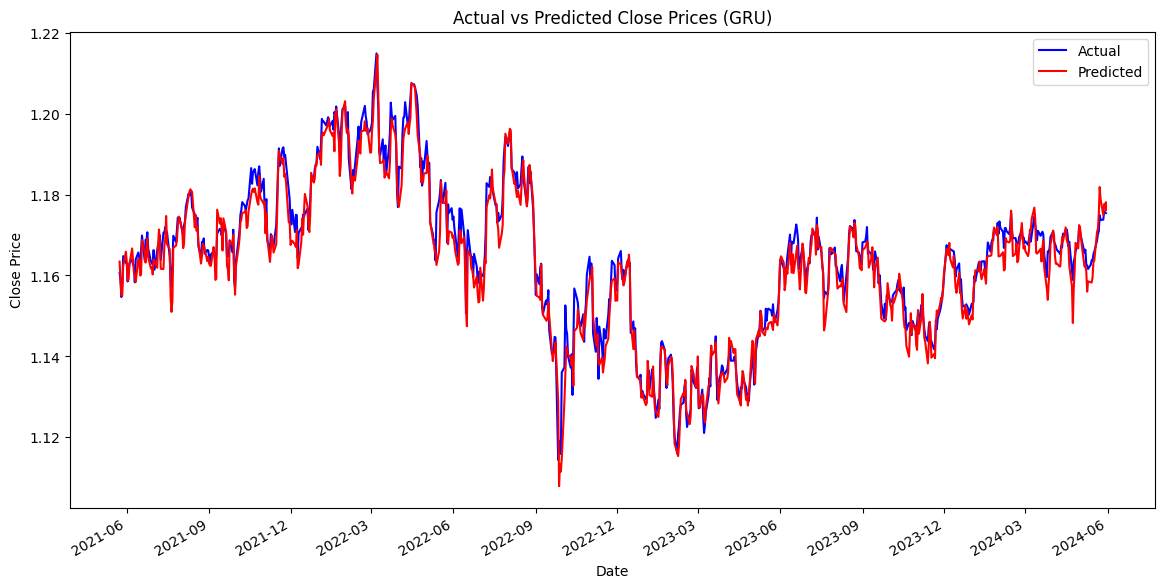

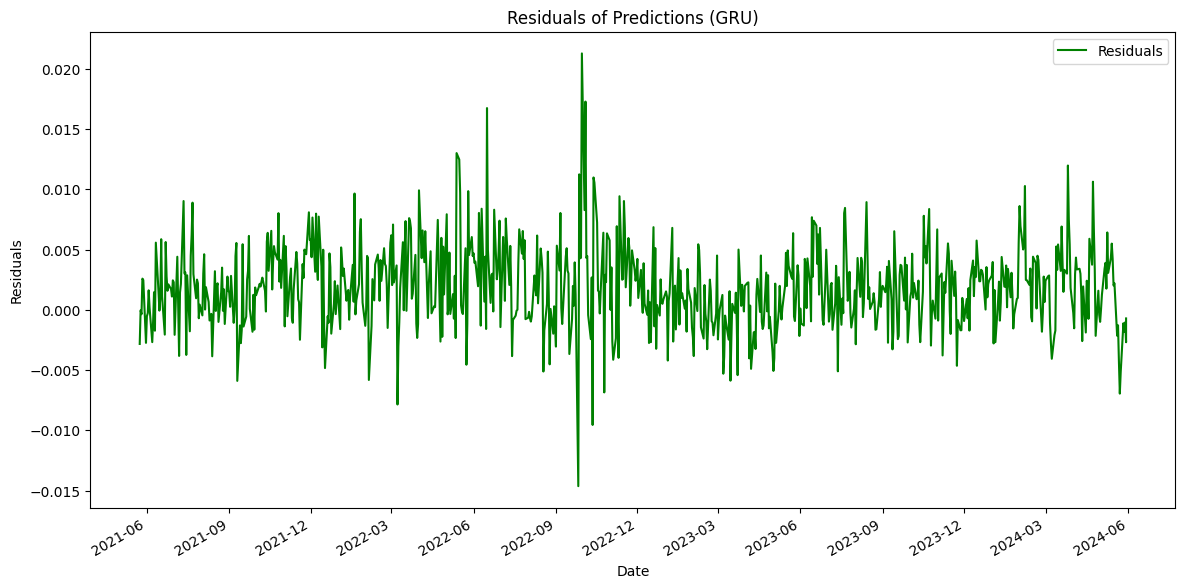

NameError: name 'best_history_gru' is not defined

In [66]:
def format_date_axis(ax):
    """
    Format the x-axis to display dates in a readable format.

    Parameters:
    ax (matplotlib.axes.Axes): The axes object to format.
    """
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()

# Visualise predictions vs actual values for GRU and Xgboost models.
def visualise_my_model_predictions(dates, y_test_true, y_predctd, my_model_name):
    """
    Plot true test vs predicted close prices.

    Parameters:
    dates (pd.Series): Dates for the x-axis.
    y_test_true (np.ndarray): Actual values of the close price.
    y_predctd (np.ndarray): Predicted values of the close price.
    my_model_name (str):  model name used for predictions.
    """
    print(f"Shapes of the arrays - dates: {dates.shape}, y_test_actual: {y_test_true.shape}, y_predctd_actual: {y_predctd.shape}")
    plt.figure(figsize=(14, 7))
    plt.plot(dates, y_test_true, label='Actual', color='blue')
    plt.plot(dates, y_predctd, label='Predicted', color='red')
    plt.title(f'Actual vs Predicted Close Prices ({my_model_name})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    format_date_axis(plt.gca())
    plt.show()

# Visualise predictions vs actual values for GPR model.
def visualise_gpr_modelpredctns(dates, y_test_true, y_predctd, sigma_gpr_test):
    """
    Plot true test vs predicted close prices with 95% confidence interval for Gaussian Process.

    Parameters:
    dates (pd.Series): Dates for the x-axis.
    y_test_true (np.ndarray): Actual values of the target variable.
    y_predctd (np.ndarray): Predicted values of the target variable.
    sigma_gpr_test (np.ndarray): Standard deviation of the predictions.
    """

    plt.plot(dates, y_test_true, label='Actual', color='blue')
    plt.plot(dates, y_pred, label='Predicted', color='red')
    plt.fill_between(dates, y_predctd.flatten() - 1.96 * sigma_gpr_test, y_predctd.flatten() + 1.96 * sigma_gpr_test, color='red', alpha=0.2, label='95% Confidence Interval')
    plt.title('Actual vs Predicted Close Prices (Gaussian Process)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    format_date_axis(plt.gca())
    plt.show()


# Visualise residuals of the models.
def visualise_model_residuals(dates, y_test_true, y_predctd, my_model_name):
    """
    Plot residuals of predictions.

    Parameters:
    dates (pd.Series): Dates for the x-axis.
    y_test_true (np.ndarray): Actual values of the target variable.
    y_predctd (np.ndarray): Predicted values of the target variable.
    my_model_name (str):  model name used for predictions.
    """
    residuals = y_test_true - y_predctd
    plt.figure(figsize=(14, 7))
    plt.plot(dates, residuals, label='Residuals', color='green')
    plt.title(f'Residuals of Predictions ({my_model_name})')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    format_date_axis(plt.gca())
    plt.show()


# Visualise the training and validation loss for the best GRU model
def visualise_training_and_validation_loss(history, my_model_name):
    """
    Plot training and validation loss over epochs.

    Parameters:
    history: History object from model training.
    my_model_name (str): model name used during training.

    Returns:
    None
    """
    ri_train_loss = history.history['loss']
    ri_val_loss = history.history['val_loss']
    ri_epochs = range(1, len(ri_train_loss) + 1)

    plt.figure(figsize=(14, 7))

    plt.plot(ri_epochs, ri_train_loss, label='Training Loss', color='blue')
    plt.plot(ri_epochs, ri_val_loss, label='Validation Loss', color='orange')

    plt.title(f'Training and Validation Loss Over Epochs ({my_model_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


# GRU plots
visualise_my_model_predictions(test_dates_seq, best_Y_test_gru_actual, best_gru_test_predictions, "GRU")
visualise_model_residuals(test_dates_seq, best_Y_test_gru_actual, best_gru_test_predictions, "GRU")
visualise_training_and_validation_loss(best_history_gru, model_name='GRU')


# XGBoost plots
visualise_my_model_predictions(test_dates_seq, y_test_flat_inverse_xgb, xgb_test_predictions, "XGBoost")
visualise_model_residuals(test_dates_seq, y_test_flat_inverse_xgb, xgb_test_predictions, "XGBoost")

# GPR plots
visualise_gpr_modelpredctns(test_dates_seq, y_test_seq_inverse_gpr, gpr_test_predictions, sigma_gpr_test)
visualise_model_residuals(test_dates_seq, y_test_seq_inverse_gpr, gpr_test_predictions, "Gaussian Process")


**Forcasting the next 10 days close prices from model's predictions.**

In [67]:
# Initialize lists to store predictions
predictions_gru = []
predictions_xgb = []
predictions_gpr = []

# Retrieve the final sequence from the test dataset
ri_final_sequence = scaled_dataX_test[-seqc_length:]

# Reshape to fit the model input shape (1, sequence_length, n_features)
ri_final_sequence = np.expand_dims(ri_final_sequence, axis=0)
final_sequence_2d =ri_final_sequence.reshape(1, -1)

# Convert NumPy array to DMatrix for XGBoost
last_sequence_dmatrix = xgb.DMatrix(ri_final_sequence.reshape(1, -1)) # Reshape to 2D array

# Start with the last sequence in the test set
current_sequence = ri_final_sequence.copy()  # Use the already defined last_sequence

# Initialize date to start predictions from (e.g., last date in the test set)
current_date = np.datetime64(test_dates_seq[-1])

# Calculate the dates for the next 10 trading days (excluding weekends)
next_dates = []
while len(next_dates) < 10:
    current_date += np.timedelta64(1, 'D')
    # Check if the current date is a weekend (Saturday = 5, Sunday = 6)
    if np.datetime64(current_date, 'D').astype(object).weekday() < 5:
        next_dates.append(current_date)

for _ in range(10):  # Predict for the next 10 trading days
    # Predict the next day's value using each model
    next_day_prediction_gru = model_gru.predict(current_sequence)
    next_day_prediction_xgb = model_xgb.predict(last_sequence_dmatrix)
    next_day_prediction_gpr = model_gpr.predict(final_sequence_2d)

    # Inverse transform the predictions
    next_day_prediction_gru = scaler_Ys.inverse_transform(next_day_prediction_gru)[0, 0]
    next_day_prediction_xgb = scaler_Ys.inverse_transform(next_day_prediction_xgb.reshape(-1, 1))[0, 0]
    next_day_prediction_gpr = scaler_Ys.inverse_transform(next_day_prediction_gpr.reshape(-1, 1))[0, 0]

    # Store predictions
    predictions_gru.append(next_day_prediction_gru)
    predictions_xgb.append(next_day_prediction_xgb)
    predictions_gpr.append(next_day_prediction_gpr)

    # modify the sequence by dropping the oldest value and inserting the predicted value
    current_sequence = np.roll(current_sequence, -1, axis=1)

    # Update with GRU's prediction
    current_sequence[0, -1, -1] = next_day_prediction_gru  # Update with GRU's prediction

    # Update the 2D sequence and DMatrix for XGBoost
    final_sequence_2d = current_sequence.reshape(1, -1)
    final_sequence_dmatrix = xgb.DMatrix(final_sequence_2d)

# Print the predicted values for the next 10 trading days
for i in range(10):
    print(f"Date: {next_dates[i]}")
    print(f"  GRU Predicted value: {predictions_gru[i]:.4f}")
    print(f"  XGBoost Predicted value: {predictions_xgb[i]:.4f}")
    print(f"  GPR Predicted value: {predictions_gpr[i]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Date: 2024-05-31T00:00:00.000000000
  GRU Predicted value: 1.1761
  XGBoost Predicted value: 1.1760
  GPR Predicted value: 1.1770
Date: 2024-06-03T00:00:00.000000000
  GRU Predicted value: 1.1402
  XGBoost Predicted value: 1.1760
  GPR Predicted value: 1.1359
Date: 2024-06-04T00:00:00.000000000
  GRU Predicted value: 1.1479
  XGBoost Predicted value: 1.1760
  GPR Predicted value: 1.1578
Date: 2024-06-05T00:00:00.000000000
  GRU Predicted value: 1.1552
  XGBoost Predicted value: 1.1760
  GPR Predicted value: 1.1614
Date: 2024-06-06T00:00:00.000000000
  GRU Predicted value: 1.1614
  XGBoost Predicted value: 1.1760


# **Building Trading Strategy**

**Defining functions to calculate performance metrics of the Trading Strategy.**

In [81]:
# Compute trading strategy daily_retruns
def compute_trading_daily_retruns(balance_record):
    """
    Compute the daily returns from the trading balance record ( history).

    Parameters:
    balance_history:An array of sequence of account balances over time.

    Returns:
    An array of the daily returns calculated from the balance history.
    """
    ri_balance_record = np.array(balance_record)
    ri_previous_balances = ri_balance_record[:-1]
    ri_current_balances = ri_balance_record[1:]
    ri_trading_daily_retruns = np.divide(np.subtract(ri_current_balances, ri_previous_balances), ri_previous_balances)

    return ri_trading_daily_retruns

In [82]:
# Compute trading strategy cummulative_retruns
def compute_cumulative_returns(initial_balance, final_balance):
    """
    Calculate the cumulative return based on the initial and final balances.

    Parameters:
    initial_balance (float): The initial amount of money in the account or portfolio.
    final_balance (float): The final amount of money in the account or portfolio after the trading period.

    Returns:
    float: The cumulative return expressed as a percentage.
    """
    cumulative_returns = ((final_balance - initial_balance) / initial_balance) * 100
    return cumulative_returns

In [83]:
# Compute trading strategy Sharpe ratio
def compute_trading_sharpe_ratio(trading_daily_retruns, risk_free_rate=0.01):
    """
    Compute the Sharpe ratio for a given set of returns.

    Parameters:
    returns: an array of daily returns.
    risk_free_rate (float): The risk-free rate, annualized (default is 1%).

    Returns:
    float: The calculated Sharpe ratio.
    """
    if len(trading_daily_retruns) == 0:
        return np.nan
    ri_excess_trading_returns = trading_daily_retruns - (risk_free_rate / 252)
    if np.std(ri_excess_trading_returns) == 0:
        return np.nan

    # Calculate the Sharpe ratio
    ri_sharpe_ratio = np.divide(np.mean(ri_excess_trading_returns), np.std(ri_excess_trading_returns))

    return ri_sharpe_ratio

In [84]:
# Compute trading strategy maximum drawdown
def compute_maximum_drawdown(balance_record):
    """
    Compute the maximum drawdown from a series of account balances.

    Parameters:
    balance_record (array-like): A sequence of account balances over time.

    Returns:
    float: The maximum drawdown observed in the balance record.
    """
    #Change the balance record to a numpy array
    ri_balances = np.array(balance_record)
    ri_peaks = np.maximum.accumulate(ri_balances)

    # Calculate the drawdown as the relative decline from the peak
    ri_drawdown =  np.divide(np.subtract(ri_peaks, ri_balances), ri_peaks)

    # Return the maximum drawdown
    ri_max_drawdown = np.max(ri_drawdown)

    return ri_max_drawdown

**Generating simple Trading Signals**

In [87]:
def trading_signals(y_true, y_predicted, dates):
    """
    Generate trading signals based on the comparison of actual and predicted values.

    Parameters:
    y_true (array-like): The actual observed values of the target variable.
    y_predicted (array-like): The predicted values of the target variable generated by a model.
    dates (array-like): The corresponding dates for each actual and predicted value.

    Returns:
    list of tuples: A compilation of genrated trading signals. Every tuple includes a date and its associated trading signal, which is either 'Buy' or 'Sell'.
    """
    trading_signals = [
        (dates[i]+1, 'Buy' if y_predicted[i + 1] > y_true[i] else 'Sell')
        for i in range(len(y_predicted) - 1)
    ]
    return trading_signals

**Simulation and Evaluation of Trade**

In [88]:
def simulate_trading(signals, y_true, dates, stop_loss_pct=0.001, take_profit_pct=0.002):
    """
    Implement and evaluate a simple trading strategy using stop loss and take profit levels.

    Parameters:
    signals: The generated trading signals as a tuple.
    y_true: An array of the actual market prices or values.
    dates: Dates corresponding to the market prices as an array.
    stop_loss_pct : stop-loss percentage level as a float.
    take_profit_pct: stop-loss percentage level as a float.

    Returns:
    tuple: Contains final balance, profit,  maximum drawdown, balance record, Sharpe ratio, and the completed dates of trades.
    """
    opening_bal = 10000
    my_bal = opening_bal
    start_positn_size = 0
    trade_dates = []
    bal_record = []


    for i, (date, signal) in enumerate(signals):
        trading_amount= y_true[i]

        if signal == 'Buy' and my_bal > trading_amount:
            start_positn_size = int(my_bal // trading_amount)
            trading_cost = start_positn_size * trading_amount
            my_bal -= trading_cost
            price_entry = trading_amount
            price_of_stop_loss = price_entry * (1 - stop_loss_pct)
            price_of_take_profit = price_entry * (1 + take_profit_pct)

            for j in range(i + 1, len(y_true)):
                if y_true[j] <= price_of_stop_loss or y_true[j] >= price_of_take_profit:
                    my_bal += start_positn_size * y_true[j]
                    start_positn_size = 0
                    break
        elif signal == 'Sell' and start_positn_size > 0:
            my_bal += start_positn_size * trading_amount
            start_positn_size = 0

        bal_record.append(max(my_bal + start_positn_size * y_true[i], 0))

        # Add the current date to the complete list of trade dates.
        trade_dates.append(date)

    final_bal = bal_record[-1] if bal_record else opening_bal
    trading_profit = final_bal - opening_bal
    trading_daily_retruns = compute_trading_daily_retruns(bal_record)
    sharpe_ratio = compute_trading_sharpe_ratio(trading_daily_retruns)
    max_drawdown = compute_maximum_drawdown(bal_record)
    cumulative_returns = compute_cumulative_returns(opening_bal, final_bal)

    return final_bal, trading_profit, sharpe_ratio, max_drawdown, cumulative_returns, bal_record, trade_dates


**Plotting Trading Performances**

In [89]:
# Visualise the plot of final balance over model testing time.
def visualise_performance(dates, balance_history, model_name):
    """
    Visualize the trading performance across model testing time using a balance history plot.

    Parameters:
    dates (array-like): Sequence of dates that align with the balance history.
    balance_history (array-like): trading account balance over time.
    model_name (str): The trading model name.

    Returns:
    None
    """
    plt.figure(figsize=(14, 7))
    plt.plot(dates, balance_history, label='Balance History', color='green')
    plt.title(f'{model_name} Trading Performance')
    plt.xlabel('Date')
    plt.ylabel('Balance')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gcf().autofmt_xdate()
    plt.show()

**Evaluating Trading Performances from model's predictions.**

In [90]:
def evaluate_models_for_trading_strategy(model, X_test, Y_test, scaler_Y, dates, model_name):
    """
    Evaluate a model's performance.

    Parameters:
    model (object): Trained model for evaluation.
    X_test: An array test set features.
    Y_test: An array test set target values.
    scaler_y: A scaler object used to reverse transform the target values.
    dates: An array of dates matching with the test set
    model_name: model name being evaluated as a string

    Returns:
    tuple: Final balance, profit, maximum drawdown, Sharpe ratio.
    """
    if len(X_test.shape) == 1:
        X_test = X_test.reshape(-1, 1)

      # Convert data to DMatrix for XGBoost Model
    if model_name == 'XGBoost':
        import xgboost as xgb
        X_test = xgb.DMatrix(X_test)

    predicted_close_price = model.predict(X_test)
    predicted_close_price = scaler_Y.inverse_transform(predicted_close_price.reshape(-1, 1)).flatten()
    y_test_actual = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).flatten()

    # Debugging outputs to compare predictions and actual results
    print(f'{model_name} Predictions: {predicted_close_price[:10]}')
    print(f'{model_name} Actual: {y_test_actual[:10]}')

    signal = trading_signals(predicted_close_price, y_test_actual, dates)

    # check signals
    print(f'{model_name} Signals: {signal[:10]}')

    final_bal, trading_profit, sharpe_ratio, max_drawdown, cumulative_returns, balance_history, trade_dates = simulate_trading(signal, y_test_actual, dates)

    print(f'{model_name} - Final Balance: {final_bal:.2f}, Trading Profit: {trading_profit:.2f}, Sharpe Ratio: {sharpe_ratio:.2f}, Maximum Drawdown: {max_drawdown:.2f}, cumulative_returns: {cumulative_returns:.2f}')

    if balance_history:
        visualise_performance(trade_dates, balance_history, model_name)
    else:
        print(f"There is no trading activity for {model_name}, so the balance history remains empty")
    return final_bal, trading_profit, sharpe_ratio, max_drawdown, cumulative_returns

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
GRU Predictions: [1.1634343 1.1588825 1.155037  1.1550542 1.1623274 1.1658853 1.1634954
 1.15881   1.1589472 1.162814 ]
GRU Actual: [1.1606  1.15883 1.15467 1.15764 1.16479 1.16314 1.16296 1.15853 1.16056
 1.163  ]
GRU Signals: [(numpy.datetime64('2021-05-24T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-25T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-26T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-27T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-31T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-06-01T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-06-02T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-03T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-04T00:00:00.000000001'), 'Buy')]
GRU - Final Balance: 21811.13, Trading Profit: 11811.13, Sharpe Ratio: 0.29, Maximum Drawdown: 0.03, cumulative_returns: 118.11

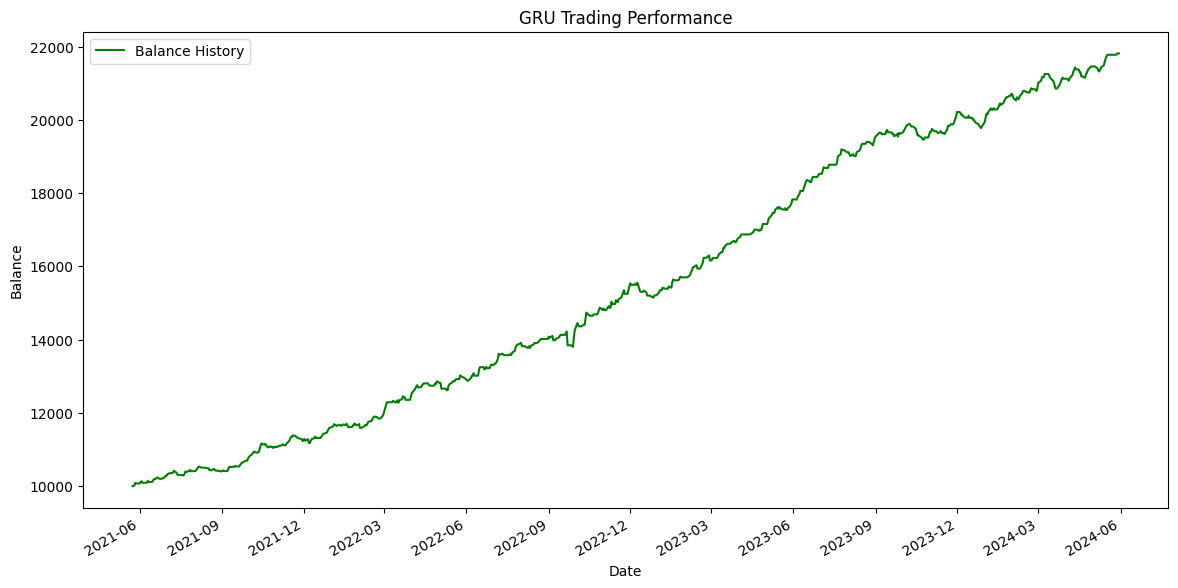

XGBoost Predictions: [1.1631866 1.1601381 1.1589262 1.1582341 1.1604383 1.1624869 1.162226
 1.158791  1.1615049 1.1620464]
XGBoost Actual: [1.1606  1.15883 1.15467 1.15764 1.16479 1.16314 1.16296 1.15853 1.16056
 1.163  ]
XGBoost Signals: [(numpy.datetime64('2021-05-24T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-25T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-26T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-27T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-31T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-01T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-06-02T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-03T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-04T00:00:00.000000001'), 'Buy')]
XGBoost - Final Balance: 23142.66, Trading Profit: 13142.66, Sharpe Ratio: 0.34, Maximum Drawdown: 0.03, cumulative_returns: 131.43


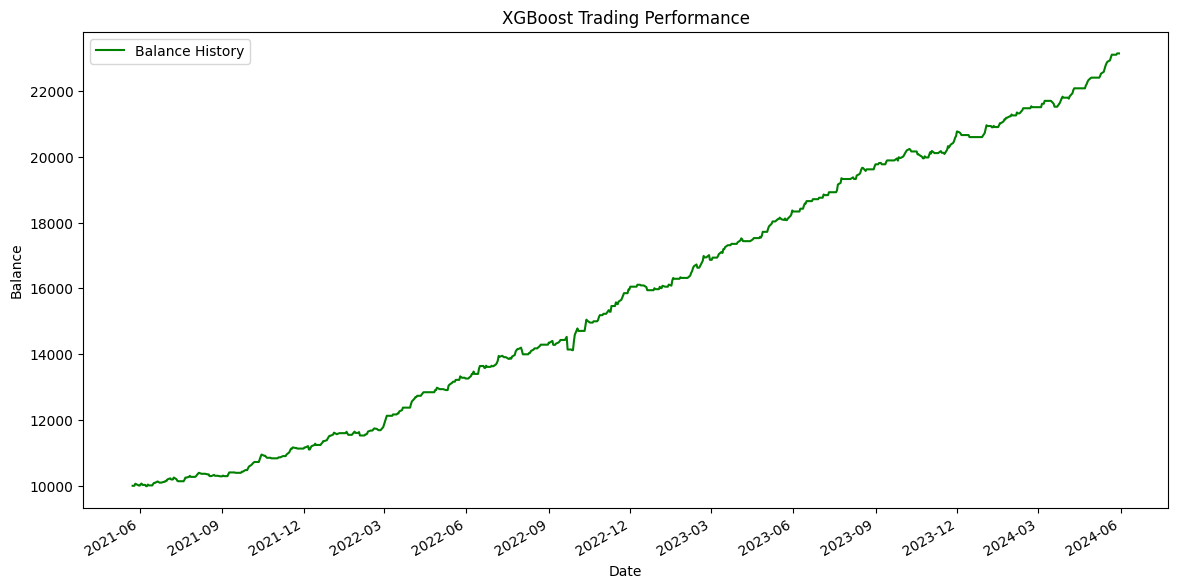

Gaussian Process Regressor Predictions: [1.16517739 1.15969649 1.15599613 1.1564126  1.16354664 1.16552127
 1.16286142 1.15981838 1.15943358 1.16248247]
Gaussian Process Regressor Actual: [1.1606  1.15883 1.15467 1.15764 1.16479 1.16314 1.16296 1.15853 1.16056
 1.163  ]
Gaussian Process Regressor Signals: [(numpy.datetime64('2021-05-24T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-25T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-26T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-27T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-05-28T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-05-31T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-06-01T00:00:00.000000001'), 'Sell'), (numpy.datetime64('2021-06-02T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-03T00:00:00.000000001'), 'Buy'), (numpy.datetime64('2021-06-04T00:00:00.000000001'), 'Buy')]
Gaussian Process Regressor - Final Balance: 23583.30, Trading Profit: 13583.30, Sharpe 

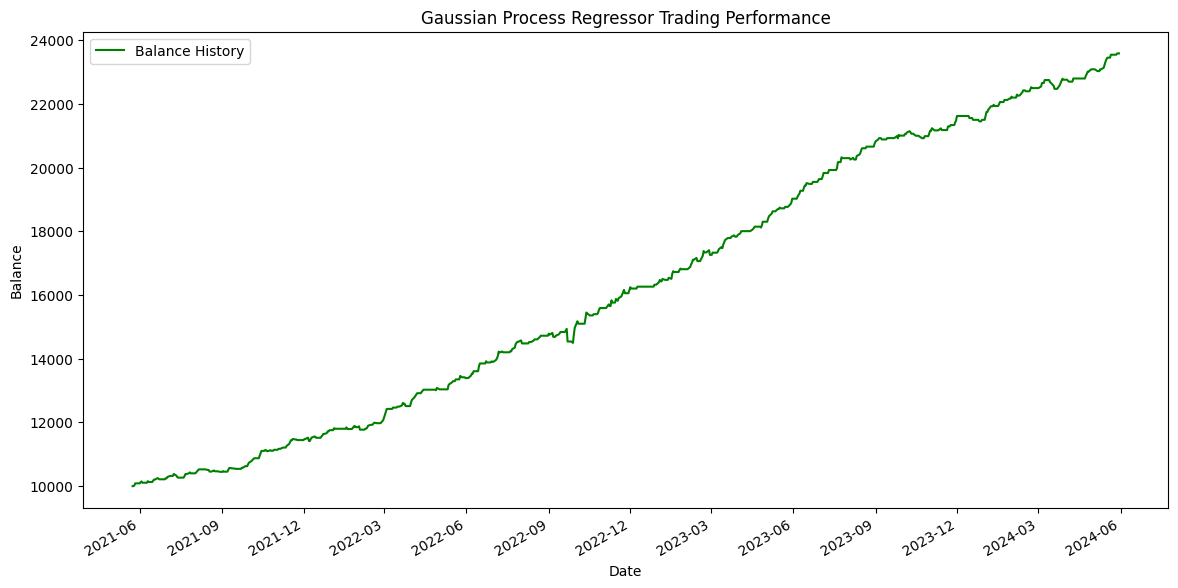

In [91]:
#Load in saved models
model_gru, model_xgb, model_gpr = load_in_models()

# Measure each model's performance and store the corresponding metrics
gru_final_bal, gru_profit, gru_sharpe_ratio, gru_maximum_drawdown, gru_cumulative_returns = evaluate_models_for_trading_strategy(model_gru, dataX_test_gru, dataY_test_gru, scaler_Ys, test_dates_seq, 'GRU')
xgb_final_bal, xgb_profit, xgb_sharpe_ratio, xgb_maximum_drawdown, xgb_cumulative_returns = evaluate_models_for_trading_strategy(model_xgb, dataX_test_flat, dataY_test_flat, scaler_Ys, test_dates_seq, 'XGBoost')
gpr_final_bal, gpr_profit, gpr_sharpe_ratio, gpr_maximum_drawdown, gpr_cumulative_returns = evaluate_models_for_trading_strategy(model_gpr, dataX_test_flat, dataY_test_flat, scaler_Ys, test_dates_seq, 'Gaussian Process Regressor')

In [92]:
# Define model names and corresponding performance metrics
models = ['GRU', 'XGBoost', 'GPR']
final_balances = [gru_final_bal, xgb_final_bal, gpr_final_bal]
profits = [gru_profit, xgb_profit, gpr_profit]
sharpe_ratios = [gru_sharpe_ratio, xgb_sharpe_ratio, gpr_sharpe_ratio]
max_drawdowns = [gru_maximum_drawdown, xgb_maximum_drawdown, gpr_maximum_drawdown]
cumulative_returns = [gru_cumulative_returns, xgb_cumulative_returns, gpr_cumulative_returns]

# Create a dictionary for the DataFrame
performance_data = {
    'Model': models,
    'Final Balance': final_balances,
    'Profit': profits,
    'Sharpe Ratio': sharpe_ratios,
    'Max Drawdown': max_drawdowns,
    'Cumulative Returns': cumulative_returns
}

# Create DataFrame from the dictionary
performance_trading_table = pd.DataFrame(performance_data)

# Print the performance metrics table
print(performance_trading_table)


     Model  Final Balance       Profit  Sharpe Ratio  Max Drawdown  \
0      GRU    21811.12953  11811.12953      0.285483      0.029424   
1  XGBoost    23142.65749  13142.65749      0.337421      0.027926   
2      GPR    23583.30464  13583.30464      0.355538      0.029424   

   Cumulative Returns  
0          118.111295  
1          131.426575  
2          135.833046  
